# <u>Project of Advanced Data Analysis:</u>

## Define the steps of the project:

**1.** Load the databases into Python preprocessing them.  
**2.** Clean the data (missing or useless values, categorize variables, and normalize them).  
**3.** Data visualization (check for existing correlations).  
**4.** Build linear, polynomial regressions and random forest algorithm for Price and Sales.  
**5.** Integrate a neural network to model the price determinants.    
**6.** Model optimization and evaluation (regularization, gradient descent boosting, R-squared, MSE).    

In [2]:
# Import usefull packages:
import tensorflow as tf # 2.4.1
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd # 1.1.5
import numpy as np # 1.19.5 / 1.20.3
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import joblib # 1.2.0
from scipy.stats import randint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### *Step 1: Load the databases*

In [3]:
# Correct file paths:
file_paths = {
    'Ad_table_extra': '/files/Andrea/Project/Database/Ad_table_extra.csv',
    'Ad_table': '/files/Andrea/Project/Database/Ad_table.csv',
    'Basic_table': '/files/Andrea/Project/Database/Basic_table.csv',
    'Image_table': '/files/Andrea/Project/Database/Image_table.csv',
    'Price_table': '/files/Andrea/Project/Database/Price_table.csv',
    'Sales_table': '/files/Andrea/Project/Database/Sales_table.csv',
    'Trim_table': '/files/Andrea/Project/Database/Trim_table.csv'
}

# Check if the files exist and load them:
for name, path in file_paths.items():
    if os.path.exists(path):
        print(f"{name} found at {path}")
        try:
            globals()[name] = pd.read_csv(path)
            # Strip leading and trailing spaces from column names
            globals()[name].columns = globals()[name].columns.str.strip()
            print(f"{name} loaded successfully")
        except Exception as e:
            print(f"Error loading {name}: {e}")
    else:
        print(f"{name} NOT found at {path}")

Ad_table_extra found at /files/Andrea/Project/Database/Ad_table_extra.csv
Ad_table_extra loaded successfully
Ad_table found at /files/Andrea/Project/Database/Ad_table.csv


/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Ad_table loaded successfully
Basic_table found at /files/Andrea/Project/Database/Basic_table.csv
Basic_table loaded successfully
Image_table found at /files/Andrea/Project/Database/Image_table.csv
Image_table loaded successfully
Price_table found at /files/Andrea/Project/Database/Price_table.csv
Price_table loaded successfully
Sales_table found at /files/Andrea/Project/Database/Sales_table.csv
Sales_table loaded successfully
Trim_table found at /files/Andrea/Project/Database/Trim_table.csv
Trim_table loaded successfully


In [4]:
# Visualization of databases:
pd.set_option('display.max_columns', None)  # Show all the columns
pd.set_option('display.width', 4000)        
pd.set_option('display.max_colwidth', None)

bold_start = "\033[1m"
bold_end = "\033[0m"

print(f"{bold_start}Ad_table:{bold_end}\n", Ad_table.head(20)) # Informations are also present in Ad_table_extra so this is not needed.
print("\n" + "-"*187 + "\n")
print(f"{bold_start}Ad_table_extra:{bold_end}\n",Ad_table_extra.head(10)) # Useful for building price prediction models.
print("\n" + "-"*187 + "\n")
print(f"{bold_start}Basic_table:{bold_end}\n",Basic_table.head(10)) # Not useful.
print("\n" + "-"*187 + "\n")
print(f"{bold_start}Image_table:{bold_end}\n",Image_table.head(10)) # Not useful.
print("\n" + "-"*187 + "\n")
print(f"{bold_start}Price_table:{bold_end}\n",Price_table.head(10)) # Essential for price forecasting, as it contains historical data on car prices.
print("\n" + "-"*187 + "\n")
print(f"{bold_start}Sales_table:{bold_end}\n",Sales_table.head(10)) # Crucial for forecasting car sales volumes.
print("\n" + "-"*187 + "\n")
print(f"{bold_start}Trim_table:{bold_end}\n",Trim_table.head(10)) #Not useful.

Ad_table:
       Maker Genmodel Genmodel_ID    Adv_ID  Adv_year  Adv_month   Color  Reg_year Bodytype Runned_Miles Engin_size    Gearbox Fuel_type  Price  Seat_num  Door_num
0   Bentley   Arnage        10_1   10_1$$1      2018          4  Silver    2000.0   Saloon        60000       6.8L  Automatic    Petrol  21500       5.0       4.0
1   Bentley   Arnage        10_1   10_1$$2      2018          6    Grey    2002.0   Saloon        44000       6.8L  Automatic    Petrol  28750       5.0       4.0
2   Bentley   Arnage        10_1   10_1$$3      2017         11    Blue    2002.0   Saloon        55000       6.8L  Automatic    Petrol  29999       5.0       4.0
3   Bentley   Arnage        10_1   10_1$$4      2018          4   Green    2003.0   Saloon        14000       6.8L  Automatic    Petrol  34948       5.0       4.0
4   Bentley   Arnage        10_1   10_1$$5      2017         11    Grey    2003.0   Saloon        61652       6.8L  Automatic    Petrol  26555       5.0       4.0
5   Bentley

#### Check and clean the dabase before merging

In [5]:
# Verify the column names in each DataFrame:
print("Ad_table_extra columns:", Ad_table_extra.columns)
print("Price_table columns:", Price_table.columns)
print("Sales_table columns:", Sales_table.columns)

Ad_table_extra columns: Index(['Maker', 'Genmodel', 'Genmodel_ID', 'Adv_ID', 'Adv_year', 'Adv_month', 'Color', 'Reg_year', 'Bodytype', 'Runned_Miles', 'Engin_size', 'Gearbox', 'Fuel_type', 'Price', 'Engine_power', 'Annual_Tax', 'Wheelbase', 'Height', 'Width', 'Length', 'Average_mpg', 'Top_speed', 'Seat_num', 'Door_num'], dtype='object')
Price_table columns: Index(['Maker', 'Genmodel', 'Genmodel_ID', 'Year', 'Entry_price'], dtype='object')
Sales_table columns: Index(['Maker', 'Genmodel', 'Genmodel_ID', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001'], dtype='object')


In [6]:
# Check the data types of the Genmodel_ID column in all DataFrames:
print("Ad_table_extra Genmodel_ID dtype:", Ad_table_extra['Genmodel_ID'].dtype)
print("Price_table Genmodel_ID dtype:", Price_table['Genmodel_ID'].dtype)
print("Sales_table Genmodel_ID dtype:", Sales_table['Genmodel_ID'].dtype)

# Print some unique values of the Genmodel_ID column in all DataFrames:
print("Ad_table_extra Genmodel_ID unique values:", Ad_table_extra['Genmodel_ID'].unique()[:5])
print("Price_table Genmodel_ID unique values:", Price_table['Genmodel_ID'].unique()[:5])
print("Sales_table Genmodel_ID unique values:", Sales_table['Genmodel_ID'].unique()[:5])

# Convert Genmodel_ID to string in all DataFrames:
Ad_table_extra['Genmodel_ID'] = Ad_table_extra['Genmodel_ID'].astype(str)
Price_table['Genmodel_ID'] = Price_table['Genmodel_ID'].astype(str)
Sales_table['Genmodel_ID'] = Sales_table['Genmodel_ID'].astype(str)

Ad_table_extra Genmodel_ID dtype: object
Price_table Genmodel_ID dtype: object
Sales_table Genmodel_ID dtype: object
Ad_table_extra Genmodel_ID unique values: ['10_1' '10_2' '10_3' '10_4' '10_5']
Price_table Genmodel_ID unique values: ['2_1' '2_2' '2_3' '2_4' '2_6']
Sales_table Genmodel_ID unique values: ['2_1' '2_2' '2_4' '2_6' '2_9']


In [7]:
# Delete useless columns:
Ad_table_extra.drop(columns=["Adv_ID", "Adv_month", "Average_mpg", "Wheelbase", "Annual_Tax"], inplace=True)

# Rename columns:
Ad_table_extra.rename(columns={"Reg_year": "Year", "Price": "Resale_Price"}, inplace=True)
Price_table.rename(columns={"Entry_price": "Original_Price"}, inplace=True)

# Add a column year in Sales_table:
colonne_anni = [str(year) for year in range(2001, 2021)]
Sales_table = pd.melt(Sales_table, id_vars=[col for col in Sales_table.columns if col not in colonne_anni], 
                      value_vars=colonne_anni, var_name='Year', value_name='Sales')
print(Sales_table.head(30))



           Maker              Genmodel Genmodel_ID  Year  Sales
0         ABARTH            ABARTH 124         2_1  2001      0
1         ABARTH            ABARTH 500         2_2  2001      0
2         ABARTH            ABARTH 595         2_4  2001      0
3         ABARTH            ABARTH 695         2_6  2001      0
4         ABARTH          ABARTH PUNTO         2_9  2001      0
5         ABARTH         ABARTH SPIDER         2_1  2001      0
6          ACURA              ACURA TL       100_1  2001      0
7          AIXAM             AIXAM 500         3_3  2001      0
8          AIXAM            AIXAM A751         3_4  2001      0
9          AIXAM           AIXAM COUPE         3_5  2001      0
10         AIXAM       AIXAM CROSSLINE         3_1  2001      0
11         AIXAM       AIXAM CROSSOVER         3_6  2001      0
12         AIXAM            AIXAM MEGA         3_7  2001      0
13         AIXAM          AIXAM SCOUTY         3_8  2001      0
14    ALFA ROMEO        ALFA ROMEO 147  

#### Merge the databases:

In [8]:
# Mergin the useful databases:
print(f"{bold_start}Ad_table_extra information:{bold_end}\n", Ad_table_extra.dtypes, "\n")
print(f"{bold_start}Price_table information:{bold_end}\n",Price_table.dtypes, "\n")
print(f"{bold_start}Sales_table information:{bold_end}\n",Sales_table.dtypes, "\n")

# Modify the column Year:
Ad_table_extra['Year'] = Ad_table_extra['Year'].astype(str)
Price_table['Year'] = Price_table['Year'].astype(float)
Price_table['Year'] = Price_table['Year'].astype(str)


print(f"{bold_start}Ad_table_extra:{bold_end}\n", Ad_table_extra.head())
print("\n" + "-"*187 + "\n")
print(f"{bold_start}Price_table:{bold_end}\n", Price_table.head())
print("\n" + "-"*187 + "\n")


Ad_table_extra information:
 Maker            object
Genmodel         object
Genmodel_ID      object
Adv_year          int64
Color            object
Year            float64
Bodytype         object
Runned_Miles     object
Engin_size       object
Gearbox          object
Fuel_type        object
Resale_Price    float64
Engine_power    float64
Height          float64
Width           float64
Length          float64
Top_speed        object
Seat_num        float64
Door_num        float64
dtype: object 

Price_table information:
 Maker             object
Genmodel          object
Genmodel_ID       object
Year               int64
Original_Price     int64
dtype: object 

Sales_table information:
 Maker          object
Genmodel       object
Genmodel_ID    object
Year           object
Sales           int64
dtype: object 

Ad_table_extra:
      Maker Genmodel Genmodel_ID  Adv_year   Color    Year Bodytype Runned_Miles Engin_size    Gearbox Fuel_type  Resale_Price  Engine_power  Height   Width  Length

In [9]:
merged_data = pd.merge(Ad_table_extra, Price_table, on=["Genmodel_ID", "Maker", "Genmodel", "Year"], how="inner")

print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216335 entries, 0 to 216334
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Maker           216335 non-null  object 
 1   Genmodel        216335 non-null  object 
 2   Genmodel_ID     216335 non-null  object 
 3   Adv_year        216335 non-null  int64  
 4   Color           197119 non-null  object 
 5   Year            216335 non-null  object 
 6   Bodytype        215971 non-null  object 
 7   Runned_Miles    215474 non-null  object 
 8   Engin_size      214704 non-null  object 
 9   Gearbox         216232 non-null  object 
 10  Fuel_type       216070 non-null  object 
 11  Resale_Price    215661 non-null  float64
 12  Engine_power    202294 non-null  float64
 13  Height          207255 non-null  float64
 14  Width           207038 non-null  float64
 15  Length          207255 non-null  float64
 16  Top_speed       194739 non-null  object 
 17  Seat_num  

In [10]:
merged_data

Maker Genmodel Genmodel_ID  Adv_year   Color    Year Bodytype Runned_Miles Engin_size    Gearbox Fuel_type  Resale_Price  Engine_power  Height   Width  Length Top_speed  Seat_num  Door_num  Original_Price
0       Bentley   Arnage        10_1      2018  Silver  2000.0   Saloon        60000       6.8L  Automatic    Petrol       21500.0           NaN  1515.0  2125.0  5390.0       NaN       5.0       4.0          145000
1       Bentley   Arnage        10_1      2018  Silver  2000.0   Saloon        53444       6.8L  Automatic    Petrol       21995.0           NaN  1515.0  2125.0  5390.0       NaN       5.0       4.0          145000
2       Bentley   Arnage        10_1      2018   Black  2000.0   Saloon        61500       6.7L  Automatic    Petrol       16500.0           NaN     NaN     NaN     NaN       NaN       NaN       NaN          145000
3       Bentley   Arnage        10_1      2017    Blue  2000.0   Saloon        49700       4.4L  Automatic    Petrol       29500.0           NaN  1515.0  2125.0  5390.0       NaN       5.0       4.0          145000
4       Bentley   Arnage        10_1      2018   White  2000.0   Saloon        75000       6.8L  Automatic    Petrol       17995.0           NaN  1515.0  2125.0  5390.0       NaN       5.0       4.0          145000
...         ...      ...         ...       ...     ...     ...      ...          ...        ...        ...       ...           ...           ...     ...     ...     ...       ...       ...       ...             ...
216330    Volvo      V50        96_9      2018  Silver  2004.0   Estate       100390       2.4L  Automatic    Petrol        1999.0         170.0  1452.0  1770.0  4514.0   134 mph       5.0       5.0           17165
216331    Volvo      V50        96_9      2018  Silver  2004.0   Estate       149000       2.0L     Manual    Diesel        1450.0         136.0  1452.0  1770.0  4514.0   130 mph       5.0       5.0           17165
216332    Volvo      V50        96_9      2018    Grey  2004.0   Estate        98167       2.4L  Automatic    Petrol        3995.0         170.0  1452.0  1770.0  4514.0   134 mph       5.0       5.0           17165
216333    Volvo      V50        96_9      2018    Grey  2004.0   Estate       152230       1.8L     Manual    Petrol        1495.0         125.0  1452.0  1770.0  4514.0   124 mph       5.0       5.0           17165
216334    Volvo      V50        96_9      2018  Silver  2004.0   Estate       111000       2.4L  Automatic    Petrol        2895.0         170.0  1452.0  1770.0  4514.0   134 mph       5.0       5.0           17165

[216335 rows x 20 columns]

### *Step 2: Cleaning* 

#### *Manage missing values:*

In [11]:
# Use isna to count the missing values
missing_values_count_merged_data = merged_data.isna().sum()
missing_values_count_Sales_table = Sales_table.isna().sum()

# Filter the columns that have missing values
columns_with_missing_values_merged_data = missing_values_count_merged_data[missing_values_count_merged_data > 0]
columns_with_missing_values_Sales_table = missing_values_count_Sales_table[missing_values_count_Sales_table > 0]

# Visualisation of columns with missing values and the number of missing values
print(f"{bold_start}Columns with missing values in merged_data:{bold_end}\n", columns_with_missing_values_merged_data)
print(f"{bold_start}Columns with missing values in Sales_table:{bold_end}\n", columns_with_missing_values_Sales_table)

# Visualize the total number of missing values for each dataframe
total_missing_values_merged_data = merged_data.isna().sum().sum()
print(f"\n{bold_start}Total missing values in the merged_data:{bold_end}", total_missing_values_merged_data)

total_missing_values_Sales_table = Sales_table.isna().sum().sum()
print(f"\n{bold_start}Total missing values in the Sales_table:{bold_end}", total_missing_values_Sales_table)

Columns with missing values in merged_data:
 Color           19216
Bodytype          364
Runned_Miles      861
Engin_size       1631
Gearbox           103
Fuel_type         265
Resale_Price      674
Engine_power    14041
Height           9080
Width            9297
Length           9080
Top_speed       21596
Seat_num         4172
Door_num         3130
dtype: int64
Columns with missing values in Sales_table:
 Series([], dtype: int64)

Total missing values in the merged_data: 93510

Total missing values in the Sales_table: 0


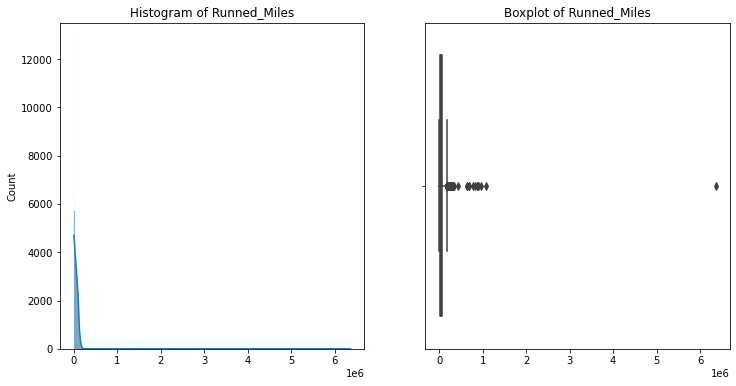

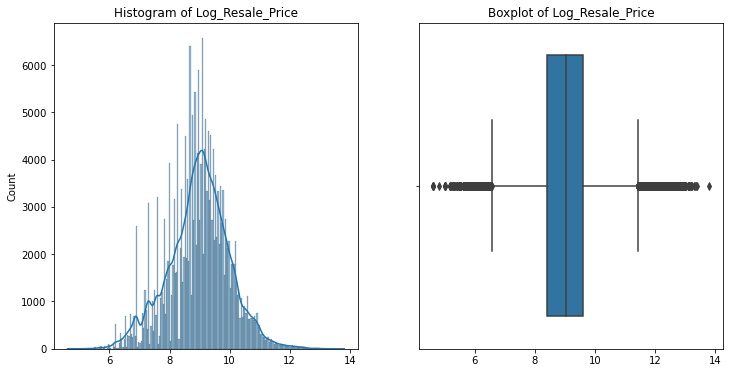

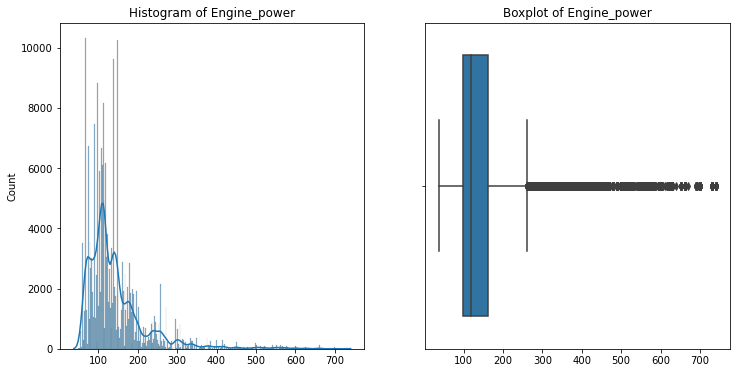

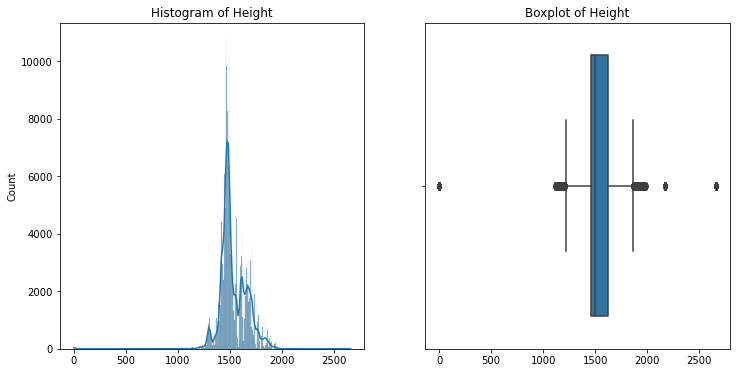

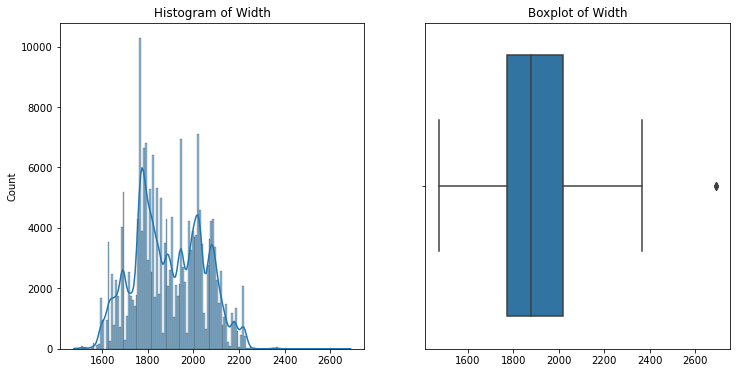

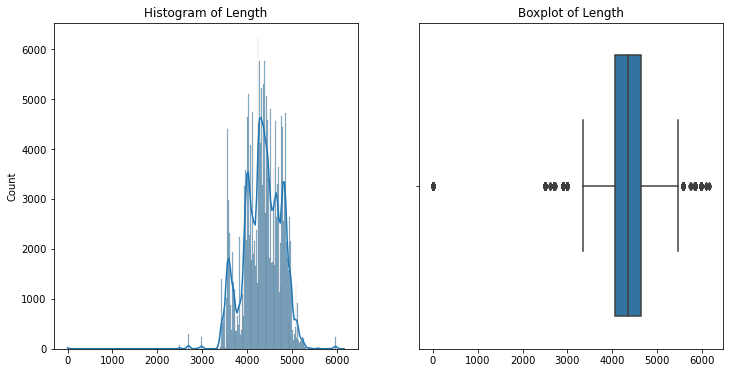

Columns with missing values after filling (if any):
Series([], dtype: int64)
There are no missing values in the dataset.


In [12]:
# Delete columns with too many missing values:
merged_data.drop(columns=["Top_speed", "Engin_size"], inplace=True)

# Numerical and categorical columns
numeric_columns = ['Runned_Miles', 'Log_Resale_Price', 'Engine_power', 'Height', 'Width', 'Length']
categorical_columns = ['Color', 'Bodytype', 'Gearbox', 'Fuel_type', 'Seat_num', 'Door_num']

# Log columns:
merged_data['Resale_Price'] = merged_data['Resale_Price'].apply(lambda x: x + 1 if x <= 0 else x)  # Add 1 to all the values that have 0 because log is not defined for these values.
merged_data['Log_Original_Price'] = np.log(merged_data['Original_Price'])
merged_data['Log_Resale_Price'] = np.log(merged_data['Resale_Price'])

merged_data.drop(columns=["Resale_Price"], inplace=True)
merged_data.drop(columns=["Original_Price"], inplace=True)

# Fill missing values in categorical columns with the mode (most frequent value)
for column in categorical_columns:
    most_frequent_value = merged_data[column].mode()[0]
    merged_data[column].fillna(most_frequent_value, inplace=True)

# Convert columns to numeric and handle errors
for column in numeric_columns:
    merged_data[column] = pd.to_numeric(merged_data[column], errors='coerce')

# Visualize histograms and boxplots for numerical columns
for column in numeric_columns:
    plt.figure(figsize=(12, 6))

    # Convert to numpy array and plot histogram
    data_array = merged_data[column].dropna().to_numpy()
    plt.subplot(1, 2, 1)
    sns.histplot(data_array, kde=True)
    plt.title(f'Histogram of {column}')

    # Convert to numpy array and plot boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data_array)
    plt.title(f'Boxplot of {column}')

    plt.show()

# Fill missing values in numerical columns with mean or median
for column in numeric_columns:
    if merged_data[column].skew() > 1:  # If the distribution is skewed, use median
        merged_data[column].fillna(merged_data[column].median(), inplace=True)
    else:  # Otherwise use mean
        merged_data[column].fillna(merged_data[column].mean(), inplace=True)

# Check for missing values after filling
missing_values_after = merged_data.isna().sum()

# Print columns with missing values (if any)
print("Columns with missing values after filling (if any):")
print(missing_values_after[missing_values_after > 0])

# Final check to ensure there are no missing values
if missing_values_after.sum() == 0:
    print(f"{bold_start}There are no missing values in the dataset.{bold_end}")
else:
    print(f"{bold_start}There are still some missing values in the dataset.{bold_end}")

### *Step 3: Data visualzation*

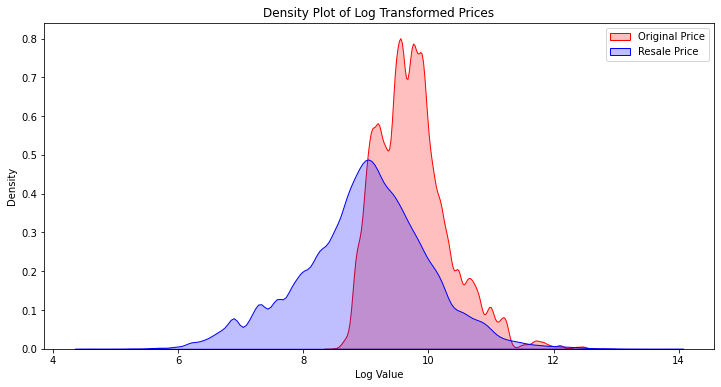

In [13]:
plt.figure(figsize=(12, 6))

sns.kdeplot(data=merged_data, x='Log_Original_Price', fill=True, color="red", label="Original Price")
sns.kdeplot(data=merged_data, x='Log_Resale_Price', fill=True, color="blue", label="Resale Price")

plt.title('Density Plot of Log Transformed Prices')
plt.xlabel('Log Value')
plt.ylabel('Density')
plt.legend()
plt.show()

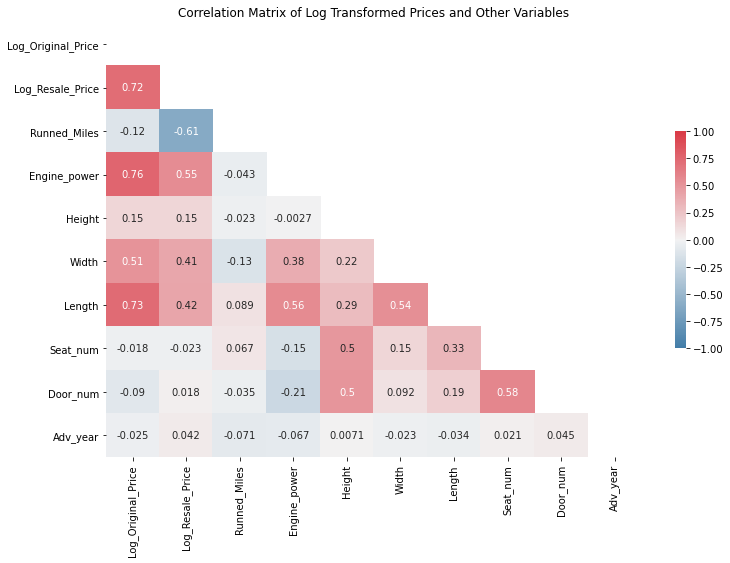

In [14]:
# List of columns to be included in the correlation matrix
correlation_columns = ['Log_Original_Price', 'Log_Resale_Price', 'Runned_Miles', 'Engine_power', 'Height', 'Width', 'Length', 
                       'Seat_num', 'Door_num', 'Year', 'Adv_year']

# Create the correlation matrix
correlation_matrix = merged_data[correlation_columns].corr()

# Mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Inversion of color map for better visual interpretation
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, annot=True, vmax=1, vmin=-1, center=0, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Log Transformed Prices and Other Variables')
plt.show()

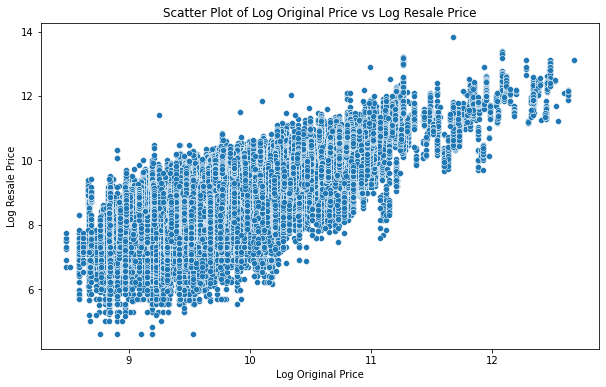

In [15]:
# Scatter plot between 'Log_Original_Price' and 'Log_Resale_Price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log_Original_Price', y='Log_Resale_Price', data=merged_data)
plt.title('Scatter Plot of Log Original Price vs Log Resale Price')
plt.xlabel('Log Original Price')
plt.ylabel('Log Resale Price')
plt.show()

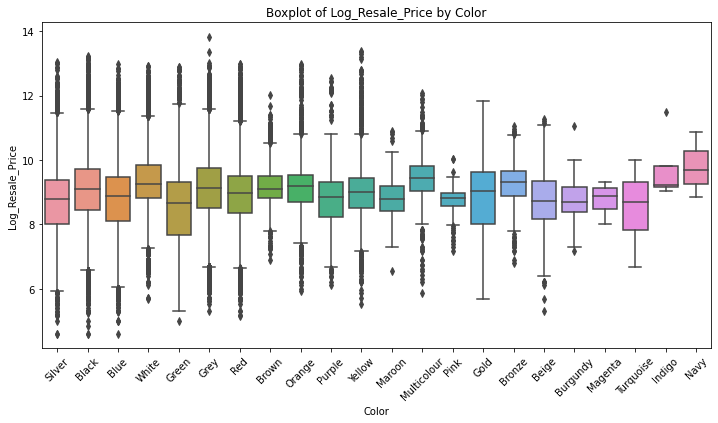

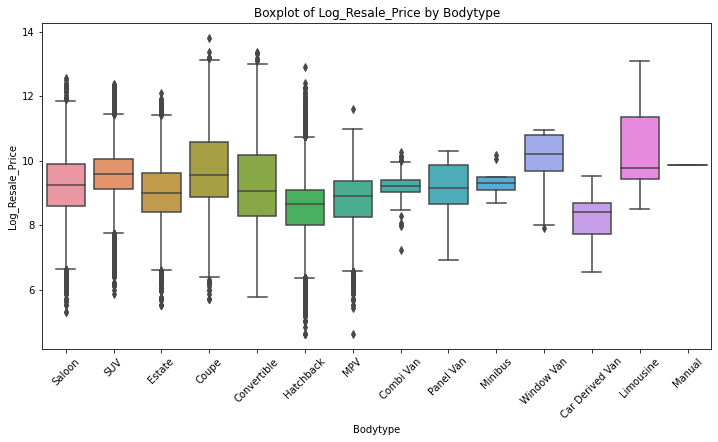

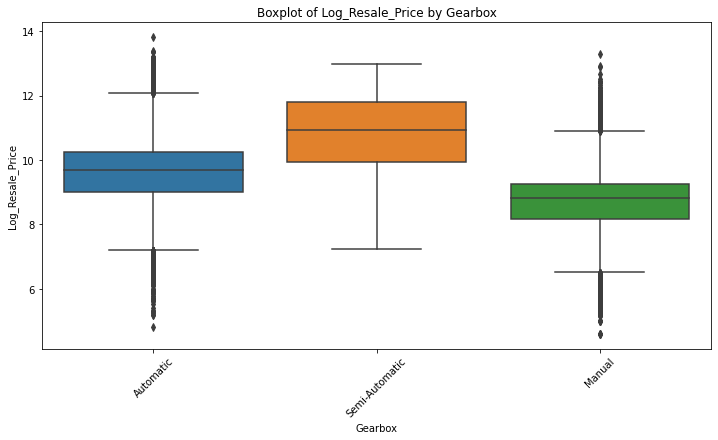

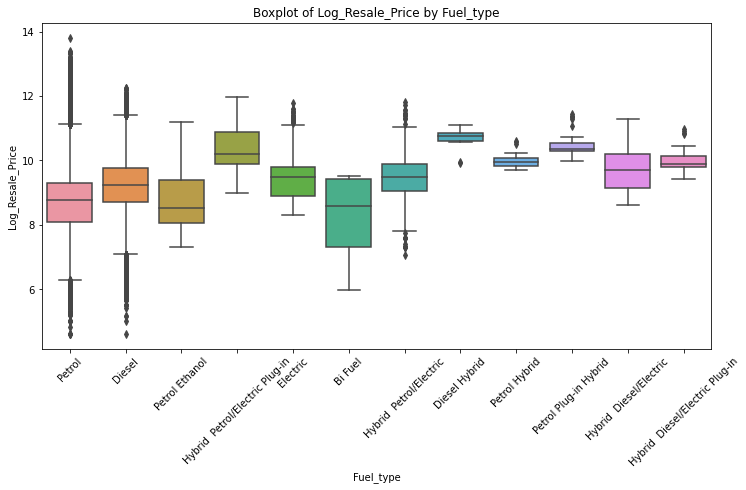

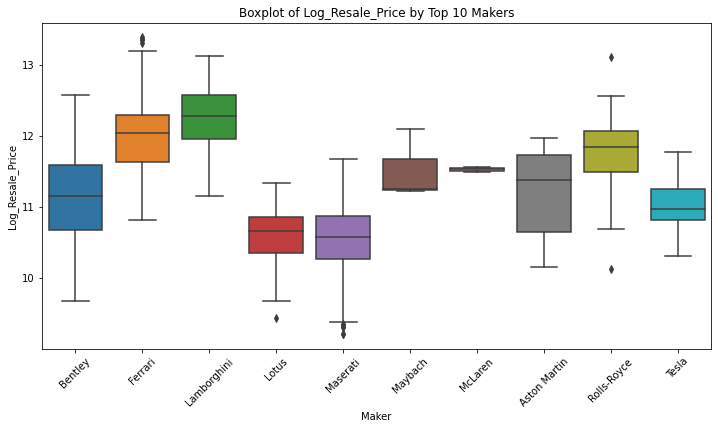

In [16]:
# Identify the numerical column and categorical columns of interest
numerical_column = 'Log_Resale_Price'  # Or 'Sales' depending on your target variable
categorical_columns = ['Color', 'Bodytype', 'Gearbox', 'Fuel_type']

# Create boxplots for each categorical variable of interest
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=col, y=numerical_column, data=merged_data)
    plt.xticks(rotation=45)
    plt.title(f'Boxplot of {numerical_column} by {col}')
    plt.show()
    
# For the 'Maker' variable, select the top 10 makers by average Log_Resale_Price
top_makers = merged_data.groupby('Maker')[numerical_column].mean().nlargest(10).index

# Filter the dataset to include only the top 10 makers
top_makers_data = merged_data[merged_data['Maker'].isin(top_makers)]

# Create a boxplot for the top 10 makers
plt.figure(figsize=(12, 6))
sns.boxplot(x='Maker', y=numerical_column, data=top_makers_data)
plt.xticks(rotation=45)
plt.title(f'Boxplot of {numerical_column} by Top 10 Makers')
plt.show()

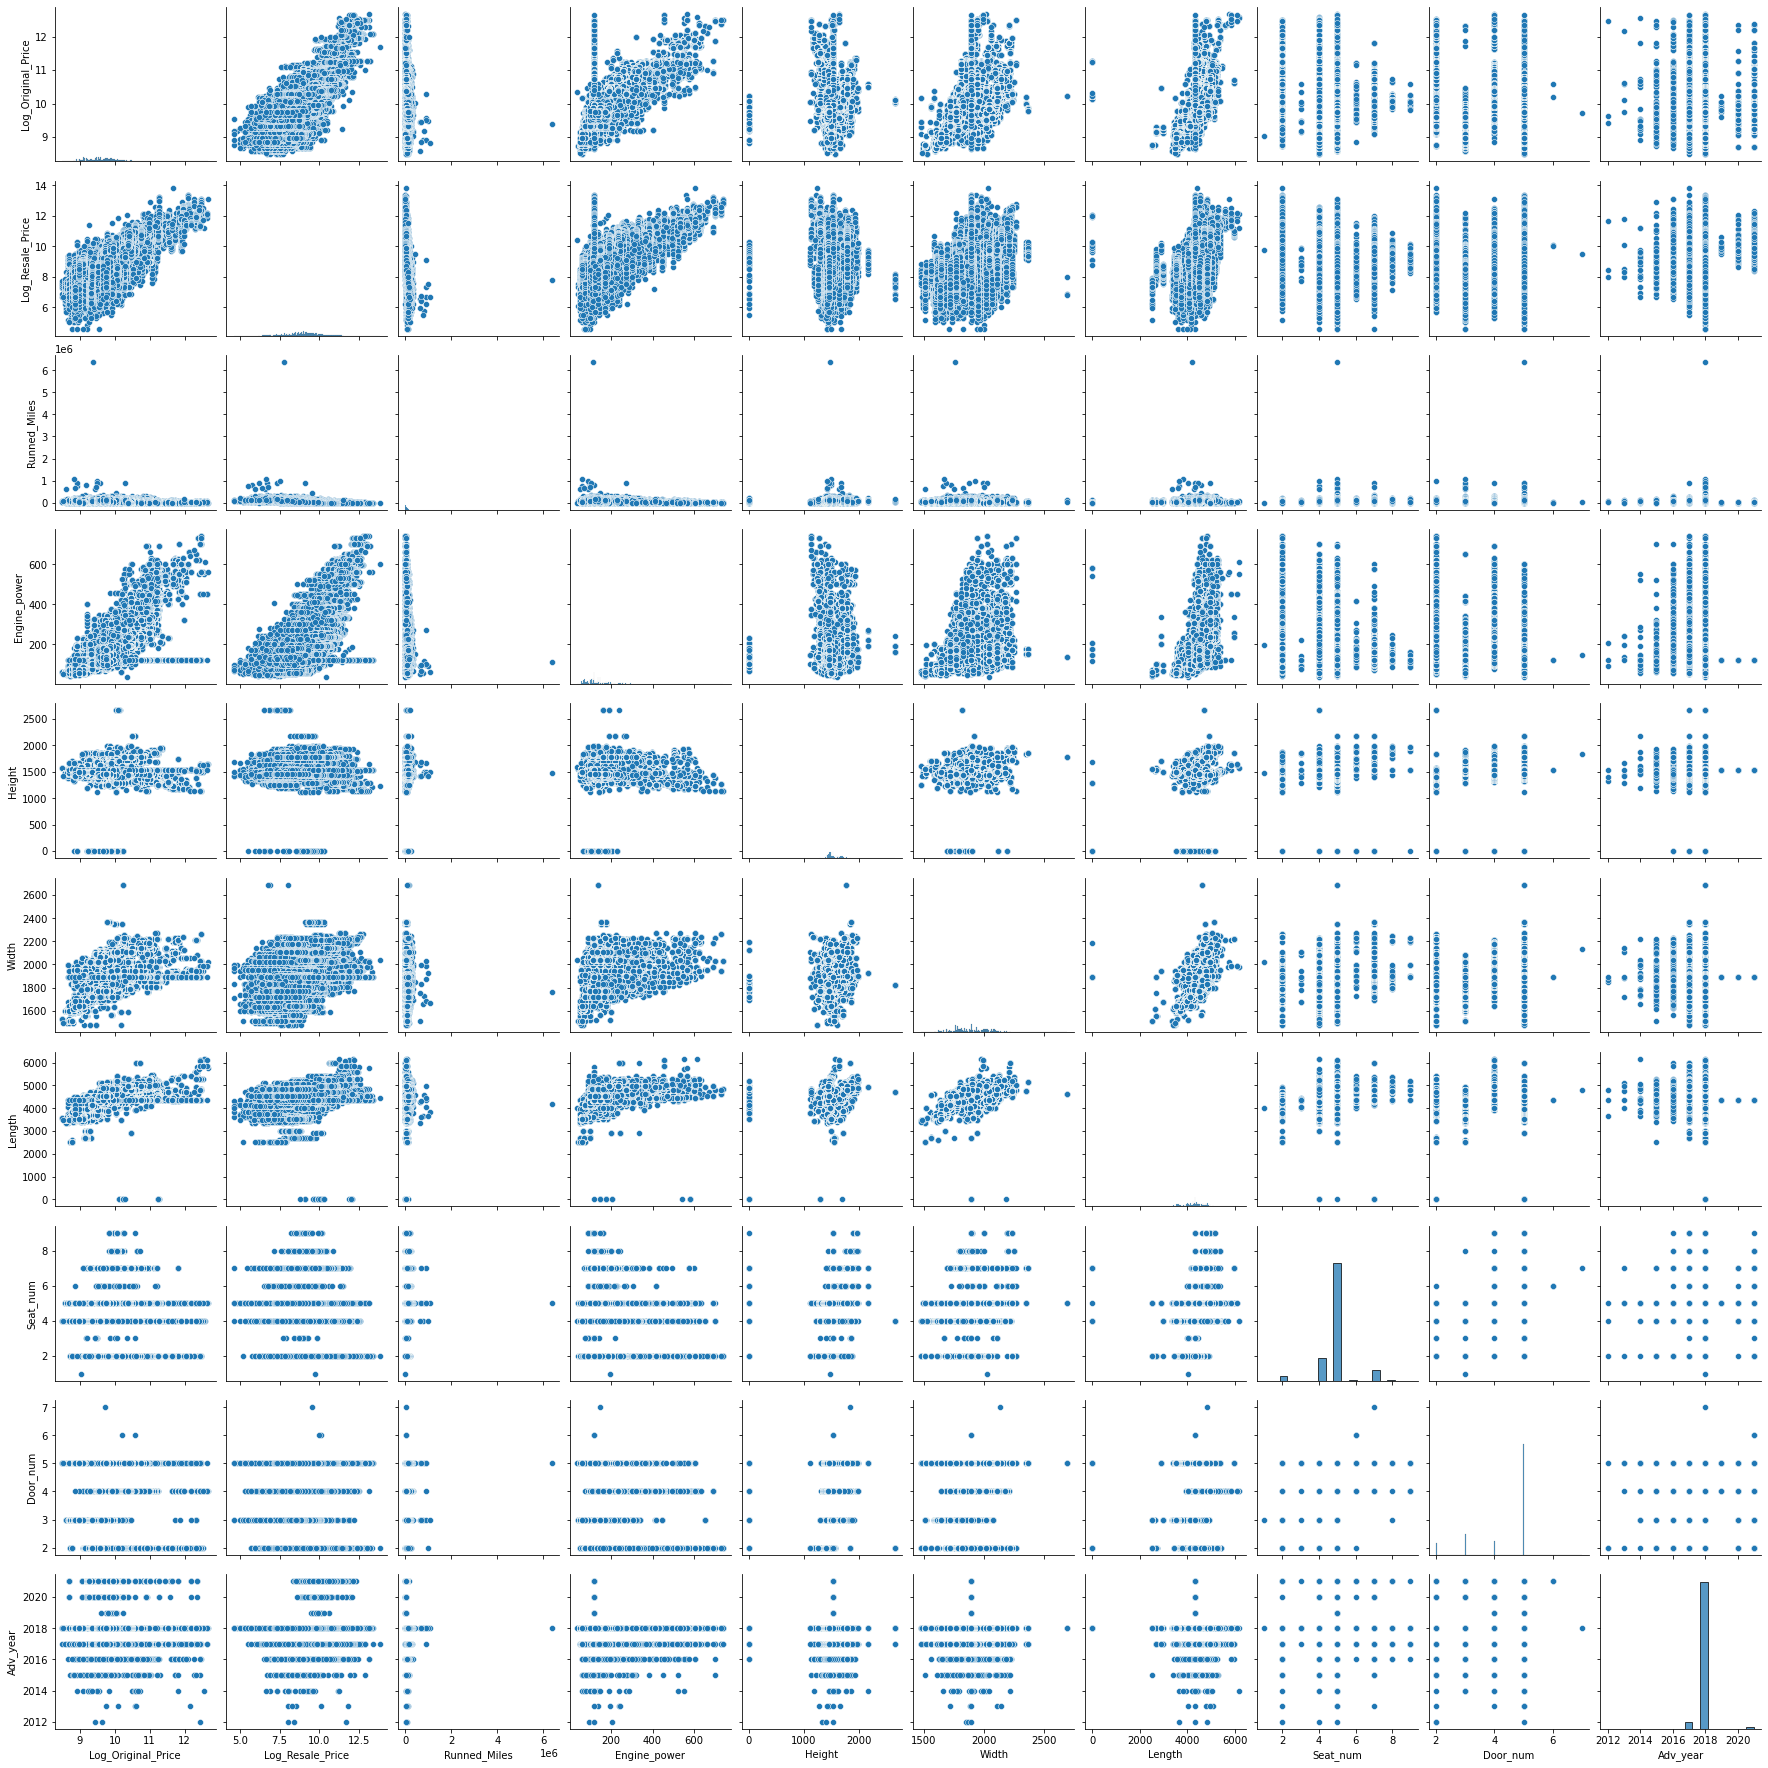

In [17]:
# Pairplot of the numerics variables
sns.pairplot(merged_data[correlation_columns])
plt.show()

### *Step 6: Models*

#### **Resale_Price:**
##### Linear and Polinomial Regressions:

Regression for Color:
Linear Regression MSE: 0.2699310256493633
Linear Regression R-squared: 0.736226146305633

Linear Regression Coefficients for Color:
           Feature  Coefficient
 Color_Multicolour     0.375622
        Color_Pink     0.262132
       Color_White     0.258492
     Color_Magenta     0.235056
      Color_Orange     0.216581
      Color_Bronze     0.206723
      Color_Yellow     0.190310
       Color_Brown     0.159101
      Color_Purple     0.152750
        Color_Grey     0.140947
       Color_Black     0.137799
         Color_Red     0.100834
      Color_Maroon     0.066607
          Door_num     0.027801
      Color_Indigo     0.025208
        Color_Blue     0.020906
   Color_Turquoise     0.016262
    Color_Burgundy     0.012932
      Engine_power     0.004872
            Height     0.000607
            Length     0.000552
             Width     0.000395
      Runned_Miles    -0.000014
      Color_Silver    -0.019912
          Seat_num    -0.075667
        Color_

/opt/conda/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


Significant Polynomial Regression Coefficients for Color:
           Feature  Coefficient
             const     5.039547
 Color_Multicolour     0.375630
        Color_Pink     0.262148
       Color_White     0.258558
     Color_Magenta     0.236322
      Color_Orange     0.216620
      Color_Bronze     0.206795
      Color_Yellow     0.190292
       Color_Brown     0.159134
      Color_Purple     0.152645
        Color_Grey     0.141007
       Color_Black     0.137874
         Color_Red     0.100899
      Color_Maroon     0.066844
          Door_num     0.027797
        Color_Blue     0.020983
      Engine_power     0.004872
            Height     0.000607
            Length     0.000552
             Width     0.000395
      Runned_Miles    -0.000014
      Color_Silver    -0.019842
          Seat_num    -0.075657
        Color_Gold    -0.142403
       Color_Green    -0.167941




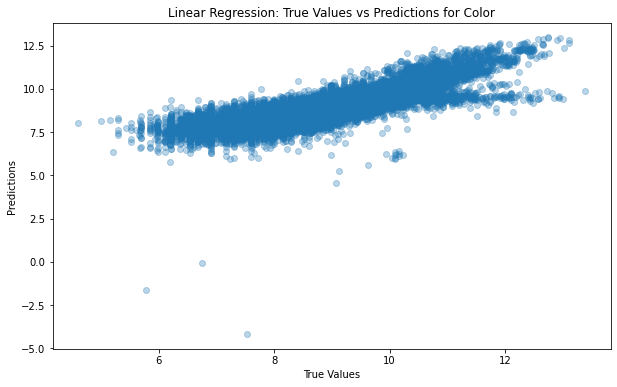

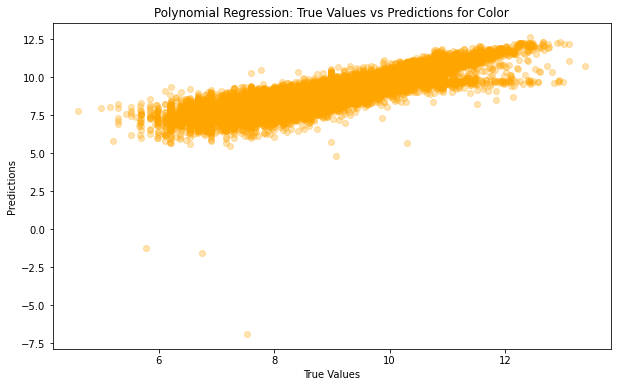

Regression for Bodytype:
Linear Regression MSE: 0.25498000843990865
Linear Regression R-squared: 0.7508361283056697

Linear Regression Coefficients for Bodytype:
              Feature   Coefficient
  Bodytype_Window Van  7.340892e-01
   Bodytype_Panel Van  4.245054e-01
   Bodytype_Combi Van  2.729952e-01
       Bodytype_Coupe  2.507251e-01
   Bodytype_Limousine  2.237192e-01
         Bodytype_SUV  1.774713e-01
     Bodytype_Minibus  1.087842e-01
 Bodytype_Convertible  6.790385e-02
             Door_num  5.682482e-02
         Engine_power  4.333473e-03
               Length  4.373117e-04
                Width  4.005860e-04
      Bodytype_Manual -2.220446e-16
         Runned_Miles -1.363318e-05
               Height -1.866200e-05
             Seat_num -1.026274e-02
      Bodytype_Estate -3.511426e-02
      Bodytype_Saloon -1.463522e-01
         Bodytype_MPV -2.301557e-01
   Bodytype_Hatchback -2.353673e-01


Fitting Polynomial Model with selected features...
Predicting with Polynomial Mo

/opt/conda/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


Significant Polynomial Regression Coefficients for Bodytype:
             Feature   Coefficient
               const  6.288472e+00
 Bodytype_Window Van  7.395738e-01
  Bodytype_Panel Van  4.295260e-01
  Bodytype_Combi Van  2.777071e-01
      Bodytype_Coupe  2.555194e-01
  Bodytype_Limousine  2.288073e-01
        Bodytype_SUV  1.825481e-01
            Door_num  5.678367e-02
        Engine_power  4.333606e-03
              Length  4.373232e-04
               Width  4.005673e-04
     Bodytype_Manual  7.163929e-16
        Runned_Miles -1.363307e-05
              Height -1.881880e-05
            Seat_num -1.030292e-02
     Bodytype_Saloon -1.413110e-01
        Bodytype_MPV -2.250048e-01
  Bodytype_Hatchback -2.303525e-01




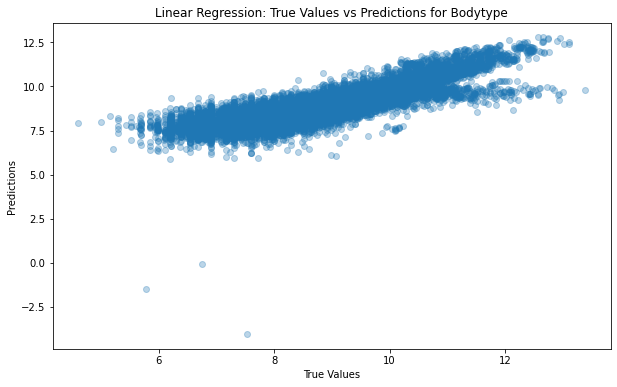

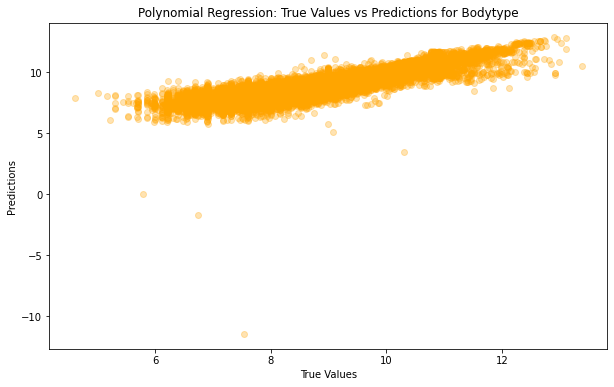

Regression for Gearbox:
Linear Regression MSE: 0.265370964854581
Linear Regression R-squared: 0.7406821913490907

Linear Regression Coefficients for Gearbox:
                Feature  Coefficient
 Gearbox_Semi-Automatic     1.249258
               Door_num     0.028402
           Engine_power     0.004374
                 Height     0.000540
                 Length     0.000479
                  Width     0.000399
           Runned_Miles    -0.000014
               Seat_num    -0.075003
         Gearbox_Manual    -0.255813


Fitting Polynomial Model with selected features...
Predicting with Polynomial Model...

Polynomial Regression MSE: 0.23524063659884623
Polynomial Regression R-squared: 0.7701252417652932



/opt/conda/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


Significant Polynomial Regression Coefficients for Gearbox:
                Feature  Coefficient
                  const     5.787904
 Gearbox_Semi-Automatic     1.249254
               Door_num     0.028403
           Engine_power     0.004374
                 Height     0.000540
                 Length     0.000479
                  Width     0.000399
           Runned_Miles    -0.000014
               Seat_num    -0.075003
         Gearbox_Manual    -0.255824




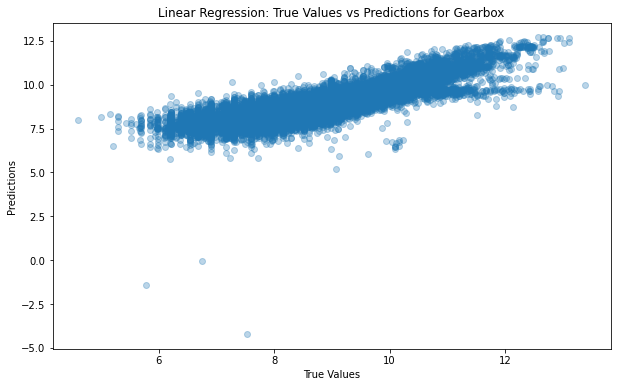

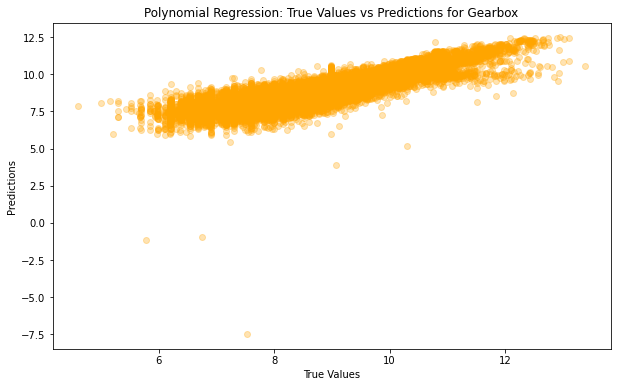

Regression for Fuel_type:
Linear Regression MSE: 0.2531784210600435
Linear Regression R-squared: 0.752596621175324

Linear Regression Coefficients for Fuel_type:
                                   Feature  Coefficient
                   Fuel_type_Diesel Hybrid     1.320758
           Fuel_type_Petrol Plug-in Hybrid     1.257931
                  Fuel_type_Petrol Ethanol     1.100122
 Fuel_type_Hybrid  Petrol/Electric Plug-in     0.825670
                   Fuel_type_Petrol Hybrid     0.762730
         Fuel_type_Hybrid  Diesel/Electric     0.688415
         Fuel_type_Hybrid  Petrol/Electric     0.687570
 Fuel_type_Hybrid  Diesel/Electric Plug-in     0.579286
                          Fuel_type_Diesel     0.339266
                        Fuel_type_Electric     0.277299
                          Fuel_type_Petrol     0.014111
                                  Door_num     0.009486
                              Engine_power     0.005305
                                    Height     0.00052

/opt/conda/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


Significant Polynomial Regression Coefficients for Fuel_type:
                                   Feature  Coefficient
                                     const     6.152873
                   Fuel_type_Diesel Hybrid     1.320905
           Fuel_type_Petrol Plug-in Hybrid     1.256585
                  Fuel_type_Petrol Ethanol     1.099886
 Fuel_type_Hybrid  Petrol/Electric Plug-in     0.826909
                   Fuel_type_Petrol Hybrid     0.764275
         Fuel_type_Hybrid  Diesel/Electric     0.689465
         Fuel_type_Hybrid  Petrol/Electric     0.688806
 Fuel_type_Hybrid  Diesel/Electric Plug-in     0.582527
                          Fuel_type_Diesel     0.340498
                        Fuel_type_Electric     0.278540
                                  Door_num     0.009481
                              Engine_power     0.005305
                                    Height     0.000529
                                     Width     0.000385
                                    Length

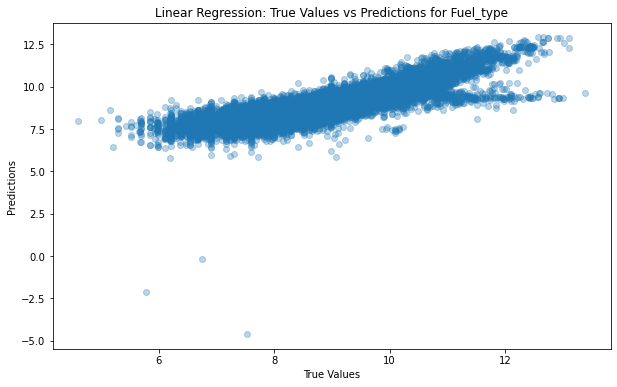

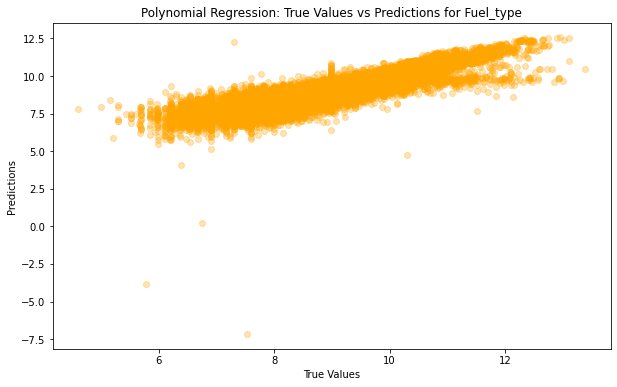

Regression for Maker:
Linear Regression MSE: 0.21906256716958117
Linear Regression R-squared: 0.7859342867182639

Linear Regression Coefficients for Maker:
             Feature  Coefficient
       Maker_McLaren     1.666633
   Maker_Lamborghini     1.368362
       Maker_Ferrari     1.029150
      Maker_Corvette     0.961710
         Maker_Lotus     0.753799
   Maker_Rolls-Royce     0.684659
           Maker_TVR     0.644793
       Maker_Bentley     0.643445
       Maker_Porsche     0.445211
  Maker_Aston Martin     0.369397
         Maker_Tesla     0.161831
         Maker_Lexus     0.125423
       Maker_Maybach     0.087355
            Door_num     0.049504
        Engine_power     0.003134
               Width     0.000823
              Height     0.000608
              Length     0.000400
        Runned_Miles    -0.000014
      Maker_Maserati    -0.005730
            Seat_num    -0.020382
          Maker_Audi    -0.025154
           Maker_BMW    -0.075267
 Maker_Mercedes-Benz    -0.0

/opt/conda/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


Significant Polynomial Regression Coefficients for Maker:
             Feature  Coefficient
               const     5.262781
       Maker_McLaren     1.664757
   Maker_Lamborghini     1.368114
       Maker_Ferrari     1.028911
      Maker_Corvette     0.958968
         Maker_Lotus     0.753499
   Maker_Rolls-Royce     0.684217
           Maker_TVR     0.643677
       Maker_Bentley     0.642729
       Maker_Porsche     0.444975
  Maker_Aston Martin     0.369711
         Maker_Tesla     0.161617
         Maker_Lexus     0.125291
            Door_num     0.049505
        Engine_power     0.003134
               Width     0.000823
              Height     0.000608
              Length     0.000400
        Runned_Miles    -0.000014
            Seat_num    -0.020376
           Maker_BMW    -0.075405
 Maker_Mercedes-Benz    -0.094024
        Maker_Subaru    -0.164474
            Maker_DS    -0.193586
    Maker_Land Rover    -0.205098
        Maker_Toyota    -0.228487
          Maker_MINI    

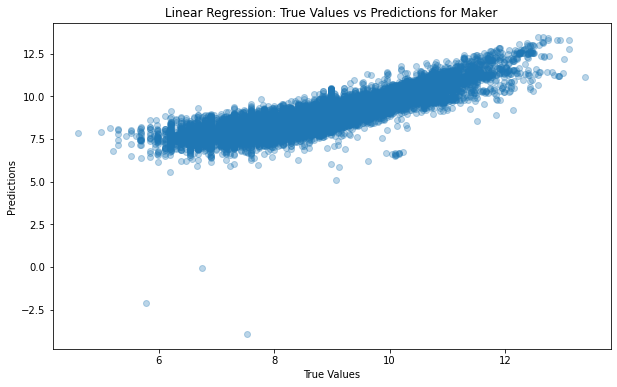

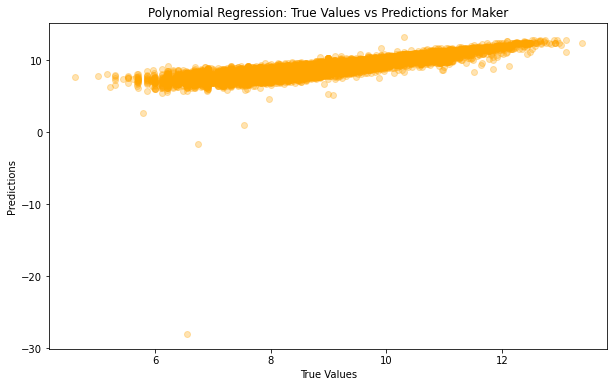

In [18]:
def get_significant_coefficients(model, X_train, alpha=0.05):
    X_train_sm = sm.add_constant(X_train)
    ols_model = sm.OLS(model.named_steps['linear_regression'].predict(model.named_steps['poly_features'].transform(X_train)), X_train_sm).fit()
    p_values = ols_model.pvalues
    coefficients = ols_model.params
    
    significant_mask = p_values < alpha
    significant_feature_names = X_train_sm.columns[significant_mask]
    significant_coefficients = coefficients[significant_mask]
    
    return significant_feature_names, significant_coefficients

def print_coefficients(coefficients, feature_names):
    df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    })
    df = df.sort_values(by='Coefficient', ascending=False)
    print(df.to_string(index=False))

# Variabili categoriche
categorical_columns = ['Color', 'Bodytype', 'Gearbox', 'Fuel_type', 'Maker']

# Loop through each categorical column
for col in categorical_columns:
    print(f"{bold_start}Regression for {col}:{bold_end}")
    
    # Definisci le variabili indipendenti (X) e dipendenti (y)
    X = merged_data[['Runned_Miles', 'Engine_power', 'Height', 'Width', 'Length', 'Seat_num', 'Door_num', col]]
    y = merged_data['Log_Resale_Price']

    # Converti le variabili categoriche in dummy (one-hot encoding)
    X = pd.get_dummies(X, drop_first=True)

    # Suddivisione train/test per la regressione lineare (tutte le variabili)
    X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.2, random_state=42)

    # Modello di regressione lineare
    linear_model = LinearRegression()
    linear_model.fit(X_train_full, y_train_full)
    linear_predictions = linear_model.predict(X_test_full)

    # Valutazione del modello di regressione lineare
    linear_mse = mean_squared_error(y_test_full, linear_predictions)
    linear_r2 = r2_score(y_test_full, linear_predictions)

    print(f"Linear Regression MSE: {linear_mse}")
    print(f"Linear Regression R-squared: {linear_r2}\n")

    # Stampa i coefficienti della regressione lineare
    print(f"{bold_start}Linear Regression Coefficients for {col}:{bold_end}")
    print_coefficients(linear_model.coef_, X.columns,)
    print("\n")
    
    # Seleziona le migliori caratteristiche per la regressione polinomiale
    selector = SelectKBest(f_regression, k='all')
    X_new = selector.fit_transform(X, y)

    # Ottieni i nomi delle caratteristiche selezionate
    selected_features = X.columns[selector.get_support()]

    # Modello di regressione polinomiale usando Pipeline
    degree = 2
    polynomial_model = Pipeline([
        ('poly_features', PolynomialFeatures(degree)),
        ('linear_regression', LinearRegression())
    ])

    print("Fitting Polynomial Model with selected features...")

    # Suddivisione train/test con le caratteristiche selezionate per la regressione polinomiale
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

    # Addestramento del modello polinomiale
    polynomial_model.fit(X_train, y_train)

    print("Predicting with Polynomial Model...\n")

    # Predizioni del modello polinomiale
    poly_predictions = polynomial_model.predict(X_test)

    # Valutazione del modello di regressione polinomiale
    poly_mse = mean_squared_error(y_test, poly_predictions)
    poly_r2 = r2_score(y_test, poly_predictions)

    print(f"Polynomial Regression MSE: {poly_mse}")
    print(f"Polynomial Regression R-squared: {poly_r2}\n")

    # Ottieni i coefficienti significativi per la regressione polinomiale
    significant_feature_names, significant_coefficients = get_significant_coefficients(polynomial_model, pd.DataFrame(X_train, columns=selected_features))

    # Stampa i coefficienti della regressione polinomiale
    print(f"{bold_start}Significant Polynomial Regression Coefficients for {col}:{bold_end}")
    print_coefficients(significant_coefficients, significant_feature_names,)
    print("\n")

    # Visualizzazione dei risultati
    # Scatter plot per il modello di regressione lineare
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_full, linear_predictions, alpha=0.3)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'Linear Regression: True Values vs Predictions for {col}')
    plt.show()

    # Scatter plot per il modello di regressione polinomiale
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, poly_predictions, alpha=0.3, color='orange')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'Polynomial Regression: True Values vs Predictions for {col}')
    plt.show()


In [19]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216335 entries, 0 to 216334
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Maker               216335 non-null  object 
 1   Genmodel            216335 non-null  object 
 2   Genmodel_ID         216335 non-null  object 
 3   Adv_year            216335 non-null  int64  
 4   Color               216335 non-null  object 
 5   Year                216335 non-null  object 
 6   Bodytype            216335 non-null  object 
 7   Runned_Miles        216335 non-null  float64
 8   Gearbox             216335 non-null  object 
 9   Fuel_type           216335 non-null  object 
 10  Engine_power        216335 non-null  float64
 11  Height              216335 non-null  float64
 12  Width               216335 non-null  float64
 13  Length              216335 non-null  float64
 14  Seat_num            216335 non-null  float64
 15  Door_num            216335 non-nul

##### Random Forest with importance of features for Resale_Price:

Random Forest Regression for Color:

Checkpoint loaded for Color
Best parameters found: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 118}
Optimized Random Forest MSE: 0.06948380220124818
Optimized Random Forest R-squared: 0.9321011349774656



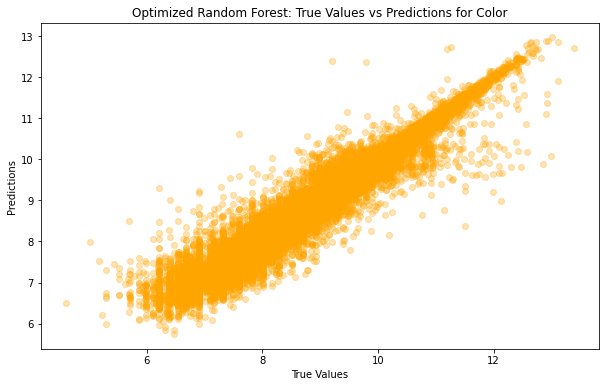

              Feature    Importance
0        Runned_Miles  4.495313e-01
1        Engine_power  3.361133e-01
4              Length  8.662564e-02
3               Width  5.187922e-02
2              Height  5.174373e-02
5            Seat_num  6.851811e-03
6            Door_num  6.535848e-03
26        Color_White  2.240698e-03
7         Color_Black  1.516358e-03
24       Color_Silver  1.499980e-03
8          Color_Blue  1.321779e-03
14         Color_Grey  1.112475e-03
23          Color_Red  1.052261e-03
13        Color_Green  8.346959e-04
12         Color_Gold  2.239095e-04
20       Color_Orange  1.970236e-04
27       Color_Yellow  1.842999e-04
22       Color_Purple  1.681912e-04
10        Color_Brown  1.606012e-04
18  Color_Multicolour  8.667116e-05
9        Color_Bronze  5.124436e-05
25    Color_Turquoise  2.457923e-05
21         Color_Pink  2.062731e-05
17       Color_Maroon  1.549334e-05
11     Color_Burgundy  7.623580e-06
16      Color_Magenta  4.433405e-07
19         Color_Navy  1.057

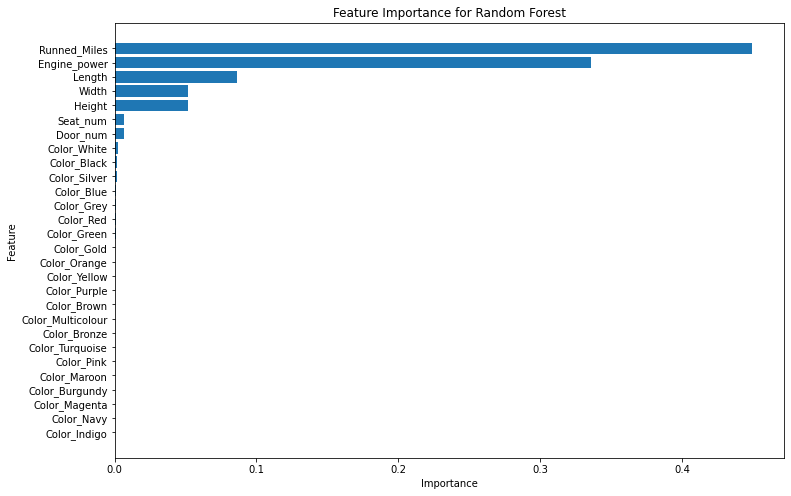

Random Forest Regression for Bodytype:

Checkpoint loaded for Bodytype
Best parameters found: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 124}
Optimized Random Forest MSE: 0.06042440015949219
Optimized Random Forest R-squared: 0.9409538905396392



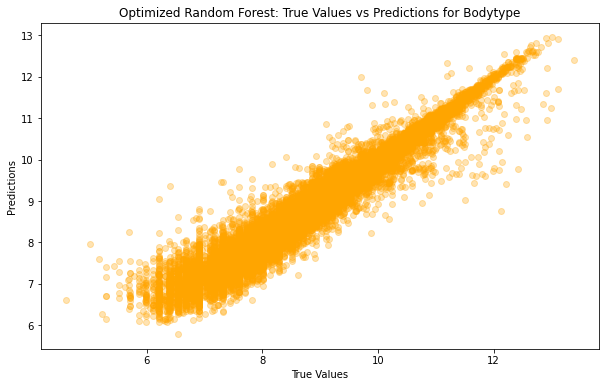

                 Feature  Importance
0           Runned_Miles    0.360265
1           Engine_power    0.185364
4                 Length    0.128062
3                  Width    0.110311
2                 Height    0.087155
11    Bodytype_Hatchback    0.046594
17          Bodytype_SUV    0.036814
5               Seat_num    0.012784
6               Door_num    0.012780
9         Bodytype_Coupe    0.007314
13          Bodytype_MPV    0.006150
8   Bodytype_Convertible    0.002436
18       Bodytype_Saloon    0.002005
10       Bodytype_Estate    0.001694
12    Bodytype_Limousine    0.000129
7     Bodytype_Combi Van    0.000078
19   Bodytype_Window Van    0.000047
16    Bodytype_Panel Van    0.000016
15      Bodytype_Minibus    0.000003
14       Bodytype_Manual    0.000000


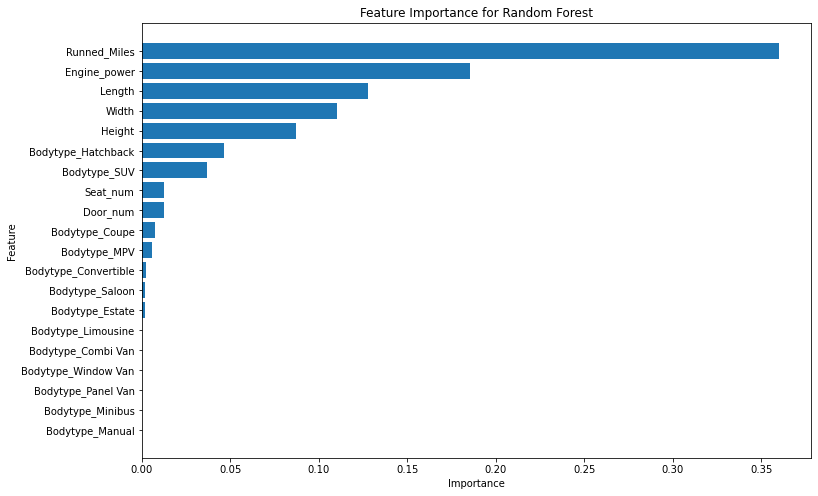

Random Forest Regression for Gearbox:

Checkpoint loaded for Gearbox
Best parameters found: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 117}
Optimized Random Forest MSE: 0.0627854173220877
Optimized Random Forest R-squared: 0.9386467285743995



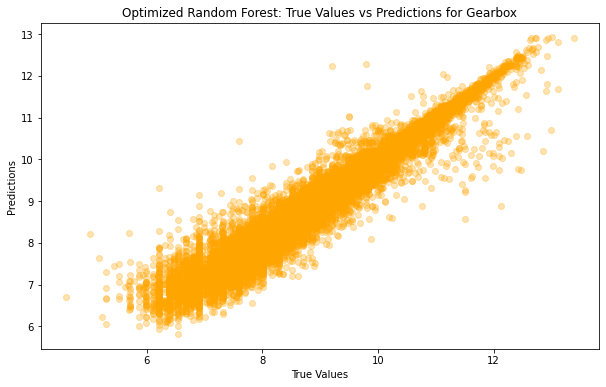

                  Feature  Importance
0            Runned_Miles    0.393178
1            Engine_power    0.206896
4                  Length    0.118600
3                   Width    0.098749
7          Gearbox_Manual    0.087178
2                  Height    0.073012
6                Door_num    0.012064
5                Seat_num    0.010164
8  Gearbox_Semi-Automatic    0.000160


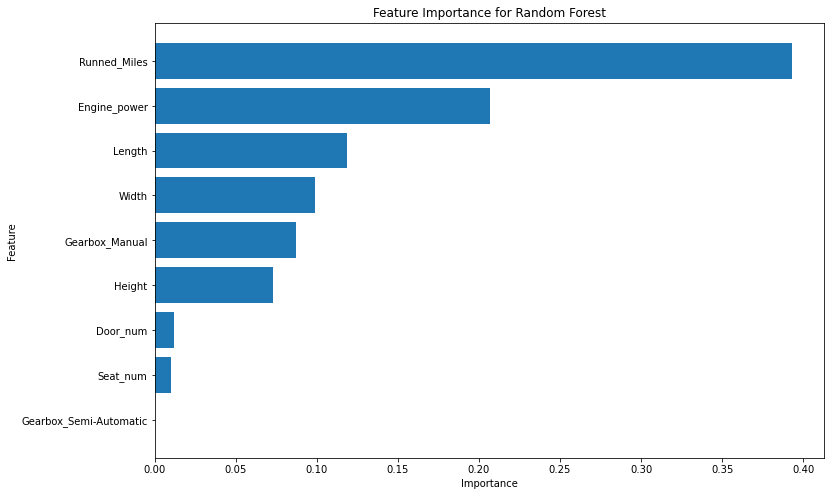

Random Forest Regression for Fuel_type:

Checkpoint loaded for Fuel_type
Best parameters found: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 124}
Optimized Random Forest MSE: 0.0645456016730757
Optimized Random Forest R-squared: 0.9369266943235914



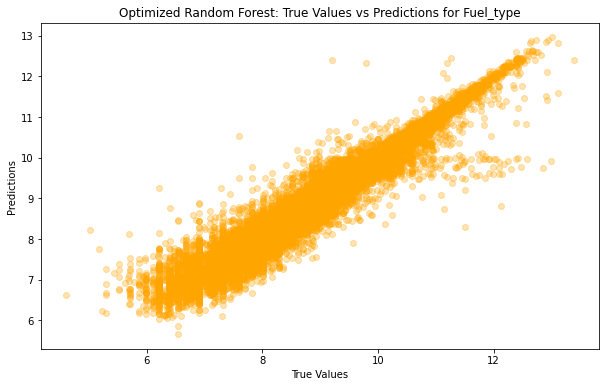

                                      Feature  Importance
0                                Runned_Miles    0.391948
1                                Engine_power    0.194517
4                                      Length    0.143116
3                                       Width    0.108256
2                                      Height    0.089576
14                           Fuel_type_Petrol    0.020226
6                                    Door_num    0.018396
5                                    Seat_num    0.015700
7                            Fuel_type_Diesel    0.014441
12          Fuel_type_Hybrid  Petrol/Electric    0.002090
13  Fuel_type_Hybrid  Petrol/Electric Plug-in    0.001266
9                          Fuel_type_Electric    0.000289
10          Fuel_type_Hybrid  Diesel/Electric    0.000066
17            Fuel_type_Petrol Plug-in Hybrid    0.000055
11  Fuel_type_Hybrid  Diesel/Electric Plug-in    0.000019
16                    Fuel_type_Petrol Hybrid    0.000019
8             

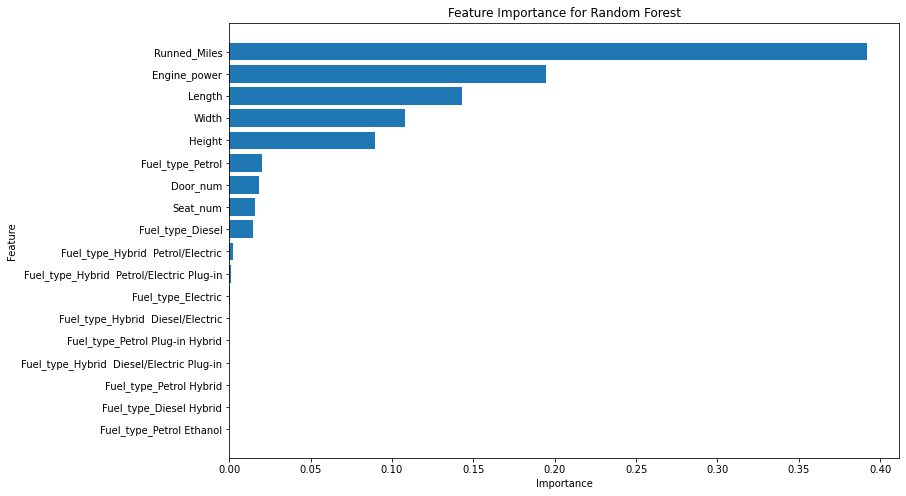

Random Forest Regression for Maker:

Checkpoint loaded for Maker
Best parameters found: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 118}
Optimized Random Forest MSE: 0.061616919398329306
Optimized Random Forest R-squared: 0.9397885728645923



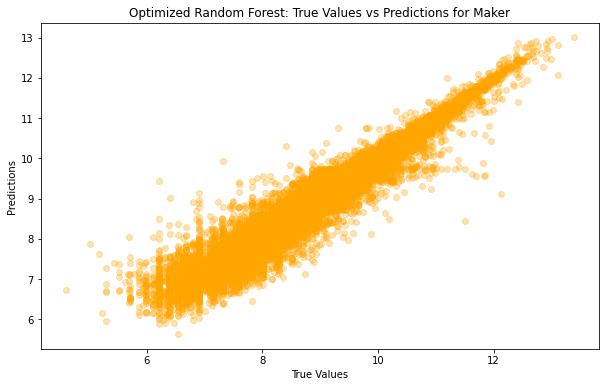

           Feature    Importance
0     Runned_Miles  4.498019e-01
1     Engine_power  3.312027e-01
4           Length  7.484491e-02
2           Height  4.077962e-02
3            Width  3.900467e-02
..             ...           ...
29     Maker_Isuzu  1.031761e-06
26    Maker_Hummer  3.182136e-07
16  Maker_Corvette  0.000000e+00
42   Maker_McLaren  0.000000e+00
35     Maker_Lexus  0.000000e+00

[65 rows x 2 columns]


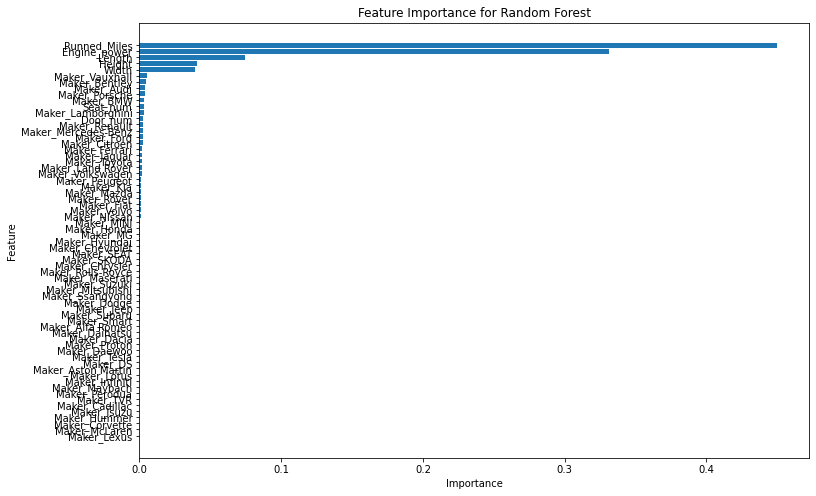

In [20]:
import os
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Function to print evaluation metrics
def print_evaluation_metrics(name, y_test, predictions):
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{name} MSE: {mse}")
    print(f"{name} R-squared: {r2}\n")
    return mse, r2

# Categorical variables
categorical_columns = ['Color', 'Bodytype', 'Gearbox', 'Fuel_type', 'Maker']

# Loop through each categorical column
for col in categorical_columns:
    print(f"Random Forest Regression for {col}:\n")
    
    # Define independent (X) and dependent (y) variables
    X = merged_data[['Runned_Miles', 'Engine_power', 'Height', 'Width', 'Length', 'Seat_num', 'Door_num', col]]
    y = merged_data['Log_Resale_Price']  # Change target variable to Log_Resale_Price

    # Convert categorical variables to dummy (one-hot encoding)
    X = pd.get_dummies(X, drop_first=True)

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Define the parameter grid with reduced parameters
    param_dist = {
        'n_estimators': randint(100, 150),  # Reduced range
        'max_features': ['auto', 'sqrt'],   # Reduced options
        'max_depth': [10, 20],              # Reduced options
        'min_samples_split': randint(2, 6), # Reduced range
        'min_samples_leaf': randint(1, 4)   # Reduced range
    }
    
    # Define paths
    predictions_path = f'predictions_{col}.pkl'
    rmse_path = f'rmse_{col}.pkl'
    model_path = f'best_rf_model_{col}.pkl'
    scaler_path = f'scaler_{col}.pkl'
    best_params_path = f'best_params_{col}.pkl'
    
    # Load checkpoints if they exist
    if os.path.exists(predictions_path) and os.path.exists(rmse_path) and os.path.exists(model_path) and os.path.exists(scaler_path) and os.path.exists(best_params_path):
        predictions_df = joblib.load(predictions_path)
        RMSE = joblib.load(rmse_path)
        mse = RMSE['mse']
        r2 = RMSE['r2']
        best_rf_model = joblib.load(model_path)
        scaler = joblib.load(scaler_path)
        best_params = joblib.load(best_params_path)
        print(f"Checkpoint loaded for {col}")
        print(f"Best parameters found: {best_params}")
        print(f"Optimized Random Forest MSE: {mse}")
        print(f"Optimized Random Forest R-squared: {r2}\n")
        
        # Predict using the loaded model
        rf_predictions = best_rf_model.predict(X_test)
    else:
        # Initialize the Random Forest model
        rf_model = RandomForestRegressor(random_state=42)

        # Initialize RandomizedSearchCV with reduced n_iter
        random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1, verbose=2, random_state=42)

        # Fit RandomizedSearchCV
        random_search.fit(X_train, y_train)

        # Get the best parameters
        best_params = random_search.best_params_
        print("Best parameters found: ", best_params)

        # Train the Random Forest model with the best parameters
        best_rf_model = RandomForestRegressor(**best_params, random_state=42)
        best_rf_model.fit(X_train, y_train)
        rf_predictions = best_rf_model.predict(X_test)

        # Evaluate the model
        rf_mse, rf_r2 = print_evaluation_metrics("Optimized Random Forest", y_test, rf_predictions)

        # Save the model, scaler, predictions, and metrics
        joblib.dump(best_rf_model, model_path)
        joblib.dump(scaler, scaler_path)
        joblib.dump(rf_predictions, predictions_path)
        joblib.dump({'mse': rf_mse, 'r2': rf_r2}, rmse_path)
        joblib.dump(best_params, best_params_path)
        print(f"Checkpoint saved for {col}")

    # Visualization of results
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, rf_predictions, alpha=0.3, color='orange')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'Optimized Random Forest: True Values vs Predictions for {col}')
    plt.show()

    # Feature importance
    importances = best_rf_model.feature_importances_
    feature_names = X.columns

    # Create a DataFrame for feature importance
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })

    # Sort the DataFrame by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print(feature_importance_df)

    # Plot feature importance
    plt.figure(figsize=(12, 8))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance for Random Forest')
    plt.gca().invert_yaxis()
    plt.show()

#### **Sales_table:**

##### Manage merge of Sales_tabke and merged_data:

In [21]:
Sales_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15460 entries, 0 to 15459
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Maker        15460 non-null  object
 1   Genmodel     15460 non-null  object
 2   Genmodel_ID  15460 non-null  object
 3   Year         15460 non-null  object
 4   Sales        15460 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 604.0+ KB


In [22]:
# Check if there are some missing values in Sales_table:
print(Sales_table.isna().sum())

Maker          0
Genmodel       0
Genmodel_ID    0
Year           0
Sales          0
dtype: int64


In [23]:
# Clean and standardize key columns in Sales_table
Sales_table['Maker'] = Sales_table['Maker'].str.strip().str.lower()
Sales_table['Genmodel'] = Sales_table['Genmodel'].str.strip().str.lower()
Sales_table['Genmodel_ID'] = Sales_table['Genmodel_ID'].str.strip().str.lower()
Sales_table['Year'] = pd.to_numeric(Sales_table['Year'], errors='coerce').fillna(0).astype(int)

# Clean and standardize key columns in merged_data
merged_data['Maker'] = merged_data['Maker'].str.strip().str.lower()
merged_data['Genmodel'] = merged_data['Genmodel'].str.strip().str.lower()
merged_data['Genmodel_ID'] = merged_data['Genmodel_ID'].str.strip().str.lower()
merged_data['Year'] = pd.to_numeric(merged_data['Year'], errors='coerce').fillna(0).astype(int)

In [24]:
# Merge Sales_table with merged_data
sales_data = Sales_table.merge(merged_data, on=['Maker', 'Year', 'Genmodel_ID'], how='inner')
sales_data

Maker Genmodel_x Genmodel_ID  Year  Sales Genmodel_y  Adv_year   Color   Bodytype  Runned_Miles    Gearbox Fuel_type  Engine_power       Height        Width       Length  Seat_num  Door_num  Log_Original_Price  Log_Resale_Price
0        audi    audi a2         7_2  2001   1938         a2      2018  Silver  Hatchback       90000.0     Manual    Diesel         120.0  1553.000000  1890.000000  3826.000000       4.0       5.0            9.474242          7.492760
1        audi    audi a2         7_2  2001   1938         a2      2018   Black  Hatchback      114000.0     Manual    Petrol         120.0  1553.000000  1890.000000  3826.000000       4.0       5.0            9.474242          7.207860
2        audi    audi a2         7_2  2001   1938         a2      2018   Black  Hatchback       49000.0     Manual    Petrol         120.0  1553.000000  1890.000000  3826.000000       4.0       5.0            9.474242          7.811973
3        audi    audi a2         7_2  2001   1938         a2      2018   Black  Hatchback      131000.0     Manual    Diesel         120.0  1553.000000  1890.000000  3826.000000       4.0       5.0            9.474242          6.866933
4        audi    audi a2         7_2  2001   1938         a2      2018   Black  Hatchback      122432.0     Manual    Petrol         120.0  1553.000000  1890.000000  3826.000000       4.0       5.0            9.474242          6.672033
...       ...        ...         ...   ...    ...        ...       ...     ...        ...           ...        ...       ...           ...          ...          ...          ...       ...       ...                 ...               ...
212037  volvo  volvo v40        96_7  2019   8110        v40      2021    Grey  Hatchback       13965.0     Manual    Petrol         120.0  1534.148686  1890.740917  4335.979851       5.0       5.0            9.959395          9.740969
212038  volvo  volvo v40        96_7  2019   8110        v40      2021   White  Hatchback        9312.0     Manual    Petrol         120.0  1534.148686  1890.740917  4335.979851       5.0       5.0            9.959395          9.769670
212039  volvo  volvo v40        96_7  2019   8110        v40      2021   Black  Hatchback       26193.0     Manual    Petrol         120.0  1534.148686  1890.740917  4335.979851       5.0       5.0            9.959395          9.658226
212040  volvo  volvo v40        96_7  2019   8110        v40      2021    Grey  Hatchback       13294.0     Manual    Petrol         120.0  1534.148686  1890.740917  4335.979851       5.0       5.0            9.959395          9.602382
212041  volvo  volvo v40        96_7  2019   8110        v40      2021    Blue  Hatchback       11913.0  Automatic    Petrol         120.0  1534.148686  1890.740917  4335.979851       5.0       5.0            9.959395          9.903488

[212042 rows x 20 columns]

##### Some visualization of sales_data:

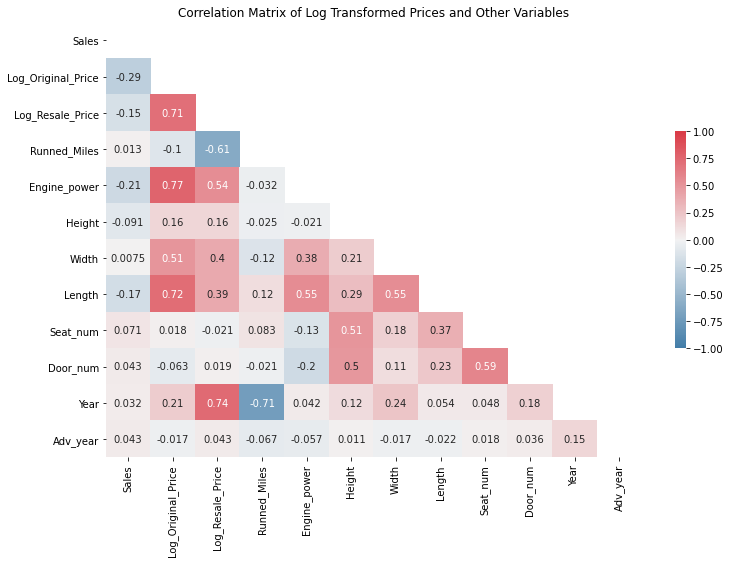

In [25]:
# List of columns to be included in the correlation matrix
correlation_columns = ['Sales', 'Log_Original_Price', 'Log_Resale_Price', 'Runned_Miles', 'Engine_power', 'Height', 'Width', 'Length', 
                       'Seat_num', 'Door_num', 'Year', 'Adv_year']

# Create the correlation matrix
correlation_matrix = sales_data[correlation_columns].corr()

# Mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Inversion of color map for better visual interpretation
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, annot=True, vmax=1, vmin=-1, center=0, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Log Transformed Prices and Other Variables')
plt.show()

There are no particular correlation with the sales that confirm my intuition about the difficulty of predicts sales of used cars.

##### Linear, Polinomial Regressions and Random Forest:

Evaluating models for Color:

Linear Regression MSE: 366272938.10296696
Linear Regression R-squared: 0.10760467313705702

Polynomial Regression MSE: 2.603310981396492e+22
Polynomial Regression R-squared: -63427633125220.94

Random Forest MSE: 37508985.44314865
Random Forest R-squared: 0.9086122947051412



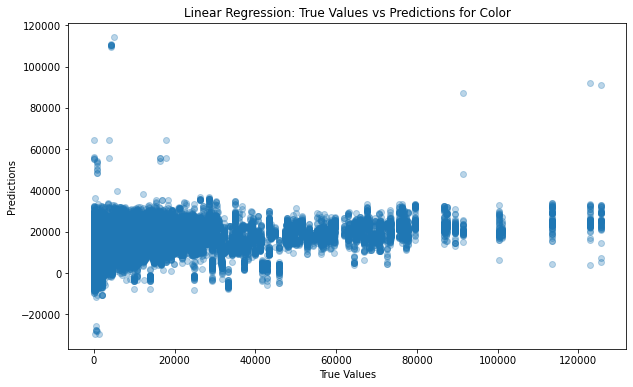

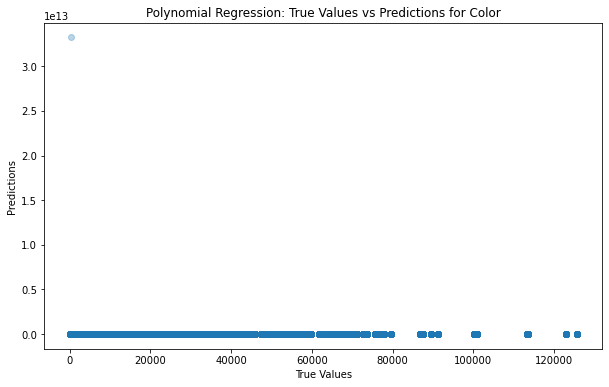

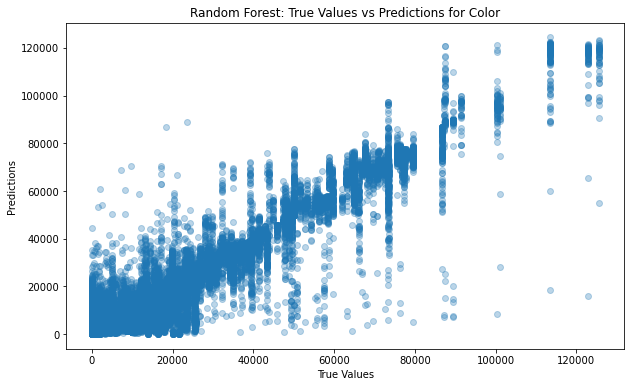

Evaluating models for Bodytype:

Linear Regression MSE: 338009439.77238244
Linear Regression R-squared: 0.17646647319699404

Polynomial Regression MSE: 283816105.02504
Polynomial Regression R-squared: 0.30850428883832337

Random Forest MSE: 39487119.56478403
Random Forest R-squared: 0.9037927258470148



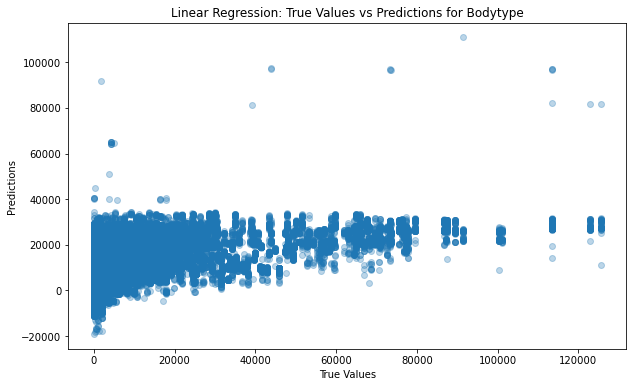

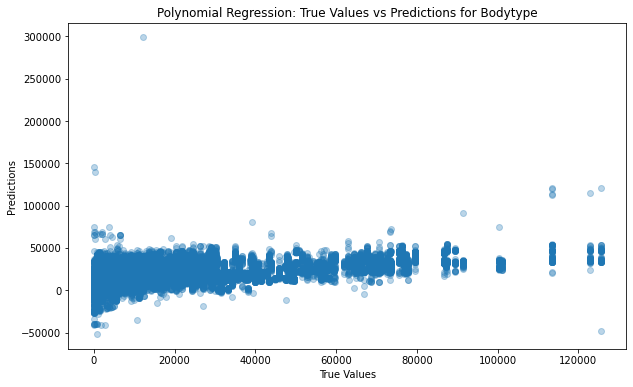

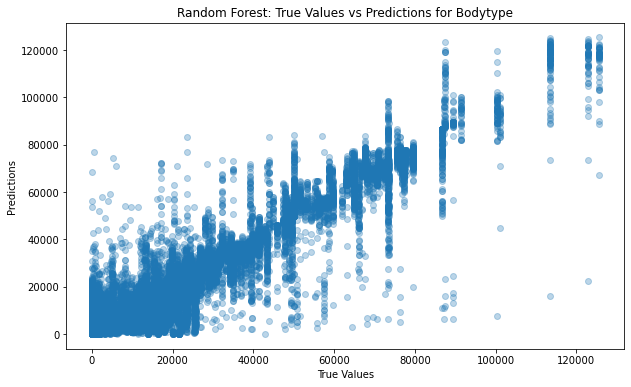

Evaluating models for Gearbox:

Linear Regression MSE: 366370132.7376277
Linear Regression R-squared: 0.10736786602207704

Polynomial Regression MSE: 323217752.5278773
Polynomial Regression R-squared: 0.21250526067002273

Random Forest MSE: 39080334.50657487
Random Forest R-squared: 0.9047838257815708



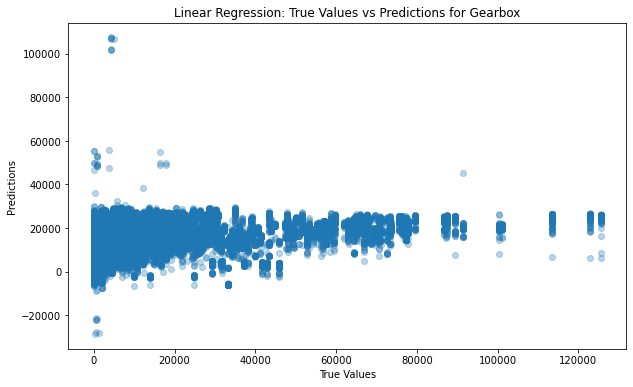

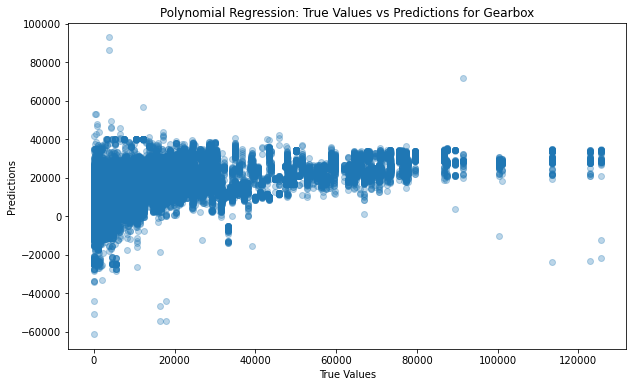

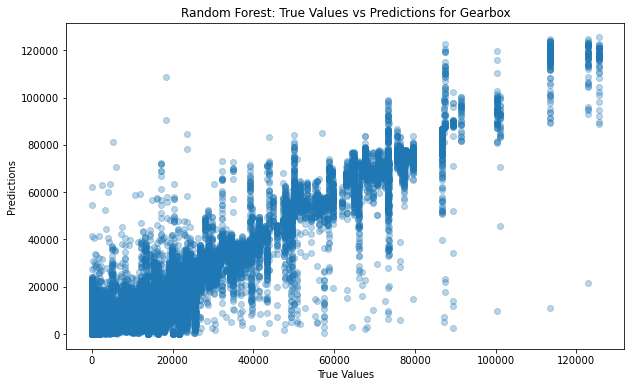

Evaluating models for Fuel_type:

Linear Regression MSE: 366264277.91171587
Linear Regression R-squared: 0.10762577301476639

Polynomial Regression MSE: 1.1867561186730659e+22
Polynomial Regression R-squared: -28914383353434.887

Random Forest MSE: 39114932.74249372
Random Forest R-squared: 0.9046995298895194



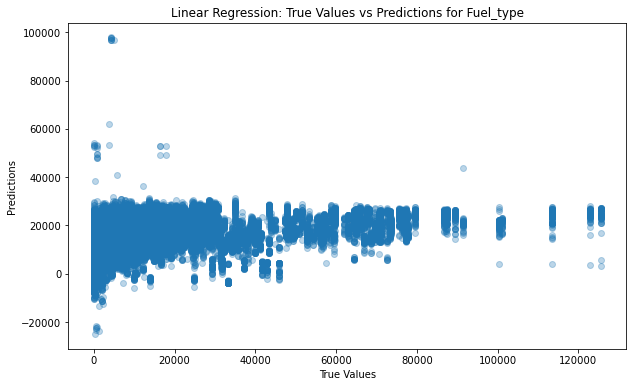

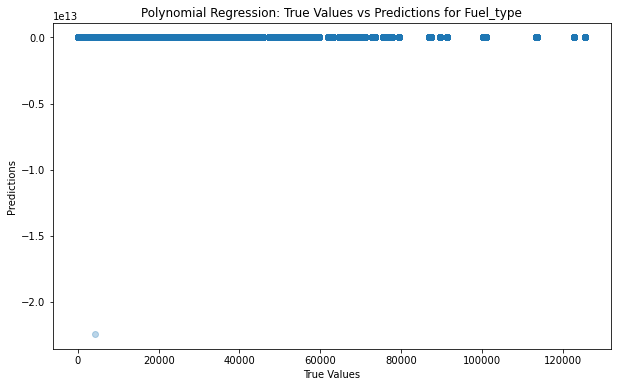

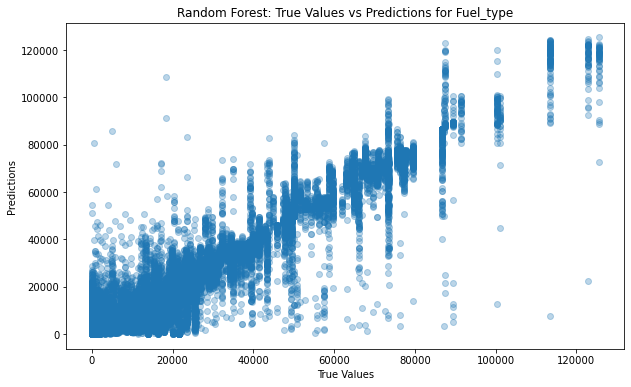

Evaluating models for Maker:

Linear Regression MSE: 268522792.96499664
Linear Regression R-squared: 0.34576524588670543

Polynomial Regression MSE: 5.186632667139984e+20
Polynomial Regression R-squared: -1263682427175.5413

Random Forest MSE: 35001261.62583636
Random Forest R-squared: 0.9147221673788446



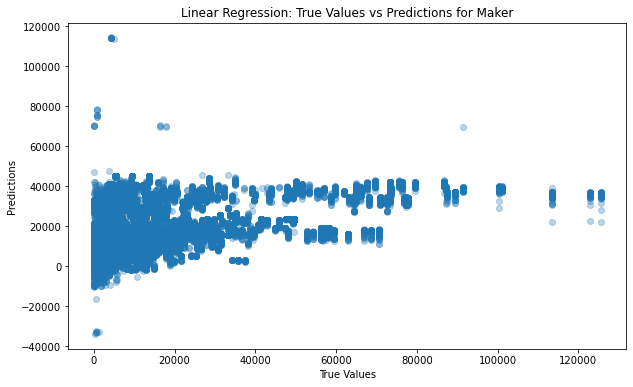

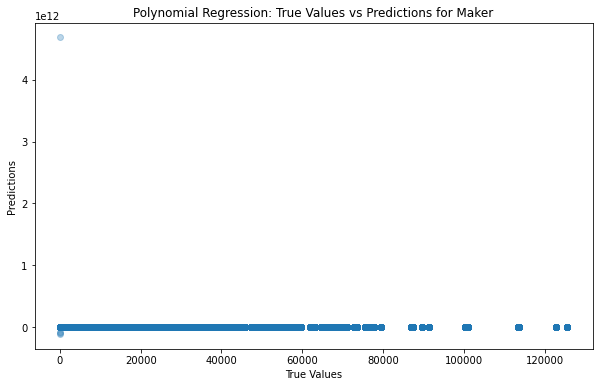

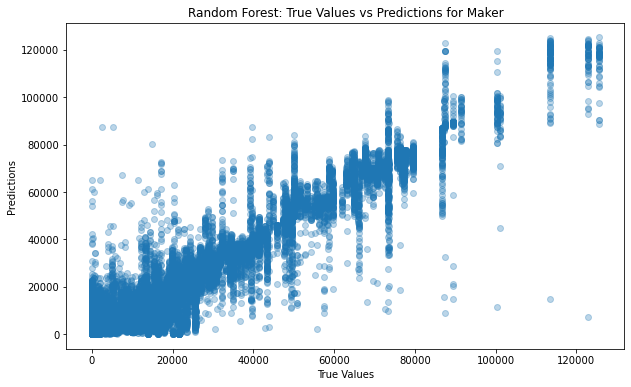

                    Model Categorical Variable           MSE     R-squared
0       Linear Regression                Color  3.662729e+08  1.076047e-01
1   Polynomial Regression                Color  2.603311e+22 -6.342763e+13
2           Random Forest                Color  3.750899e+07  9.086123e-01
3       Linear Regression             Bodytype  3.380094e+08  1.764665e-01
4   Polynomial Regression             Bodytype  2.838161e+08  3.085043e-01
5           Random Forest             Bodytype  3.948712e+07  9.037927e-01
6       Linear Regression              Gearbox  3.663701e+08  1.073679e-01
7   Polynomial Regression              Gearbox  3.232178e+08  2.125053e-01
8           Random Forest              Gearbox  3.908033e+07  9.047838e-01
9       Linear Regression            Fuel_type  3.662643e+08  1.076258e-01
10  Polynomial Regression            Fuel_type  1.186756e+22 -2.891438e+13
11          Random Forest            Fuel_type  3.911493e+07  9.046995e-01
12      Linear Regression

In [26]:
# Function to print evaluation metrics
def print_evaluation_metrics(name, y_test, predictions):
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{name} MSE: {mse}")
    print(f"{name} R-squared: {r2}\n")
    return mse, r2

# Categorical variables
categorical_columns = ['Color', 'Bodytype', 'Gearbox', 'Fuel_type', 'Maker']

# Dictionary to store results
results = {
    'Model': [],
    'Categorical Variable': [],
    'MSE': [],
    'R-squared': []
}

# Loop through each categorical column
for col in categorical_columns:
    print(f"{bold_start}Evaluating models for {col}:{bold_end}\n")
    
    # Define independent (X) and dependent (y) variables
    X = sales_data[['Runned_Miles', 'Engine_power', 'Height', 'Width', 'Length', 'Seat_num', 'Door_num', col]]
    y = sales_data['Sales']

    # Convert categorical variables to dummy (one-hot encoding)
    X = pd.get_dummies(X, drop_first=True)

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Linear regression model
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    linear_predictions = linear_model.predict(X_test)

    # Polynomial regression model
    degree = 2
    polynomial_model = Pipeline([
        ('poly_features', PolynomialFeatures(degree)),
        ('linear_regression', LinearRegression())
    ])
    polynomial_model.fit(X_train, y_train)
    poly_predictions = polynomial_model.predict(X_test)

    # Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)

    # Evaluation of models
    linear_mse, linear_r2 = print_evaluation_metrics("Linear Regression", y_test, linear_predictions)
    poly_mse, poly_r2 = print_evaluation_metrics("Polynomial Regression", y_test, poly_predictions)
    rf_mse, rf_r2 = print_evaluation_metrics("Random Forest", y_test, rf_predictions)

    # Store results
    results['Model'].extend(['Linear Regression', 'Polynomial Regression', 'Random Forest'])
    results['Categorical Variable'].extend([col] * 3)
    results['MSE'].extend([linear_mse, poly_mse, rf_mse])
    results['R-squared'].extend([linear_r2, poly_r2, rf_r2])

    # Visualization of results
    models_predictions = {
        'Linear Regression': linear_predictions,
        'Polynomial Regression': poly_predictions,
        'Random Forest': rf_predictions
    }

    for model_name, predictions in models_predictions.items():
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, predictions, alpha=0.3)
        plt.xlabel('True Values')
        plt.ylabel('Predictions')
        plt.title(f'{model_name}: True Values vs Predictions for {col}')
        plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

##### Random Forest with importance of features for Sales:

Random Forest Regression for Color:

Checkpoint loaded for Color
Best parameters found: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 118}
Optimized Random Forest MSE: 29825800.071289793
Optimized Random Forest R-squared: 0.9273317741097077



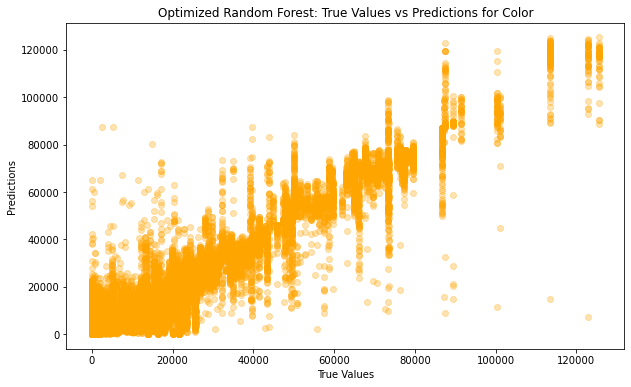

              Feature    Importance
2              Height  3.093424e-01
4              Length  2.922766e-01
3               Width  2.581785e-01
5            Seat_num  6.243857e-02
0        Runned_Miles  3.307854e-02
1        Engine_power  2.971479e-02
6            Door_num  7.138142e-03
24       Color_Silver  1.163515e-03
7         Color_Black  9.354219e-04
26        Color_White  8.422808e-04
23          Color_Red  8.314984e-04
8          Color_Blue  7.624945e-04
14         Color_Grey  6.216495e-04
22       Color_Purple  5.634254e-04
13        Color_Green  5.525852e-04
27       Color_Yellow  5.523587e-04
20       Color_Orange  3.084176e-04
10        Color_Brown  2.785827e-04
12         Color_Gold  1.427040e-04
9        Color_Bronze  1.293620e-04
21         Color_Pink  5.574180e-05
18  Color_Multicolour  4.067452e-05
25    Color_Turquoise  3.412855e-05
11     Color_Burgundy  9.590882e-06
17       Color_Maroon  7.725542e-06
16      Color_Magenta  2.967354e-07
19         Color_Navy  2.122

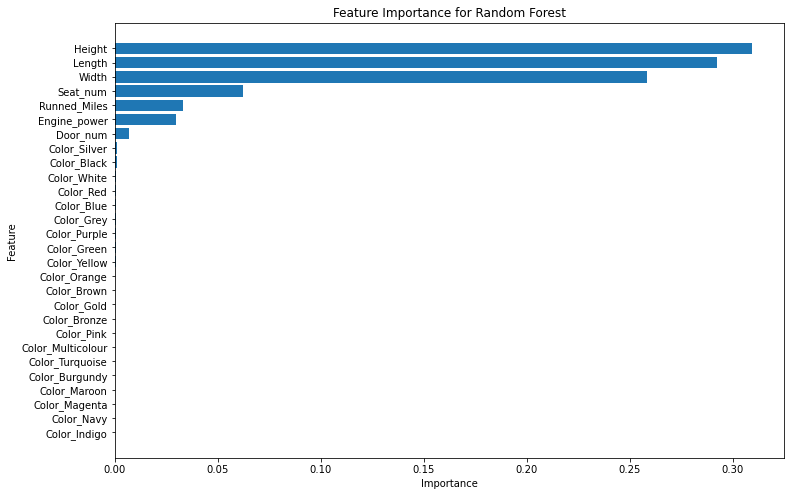

Random Forest Regression for Bodytype:

Checkpoint loaded for Bodytype
Best parameters found: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 124}
Optimized Random Forest MSE: 30474679.872859105
Optimized Random Forest R-squared: 0.925750829294032



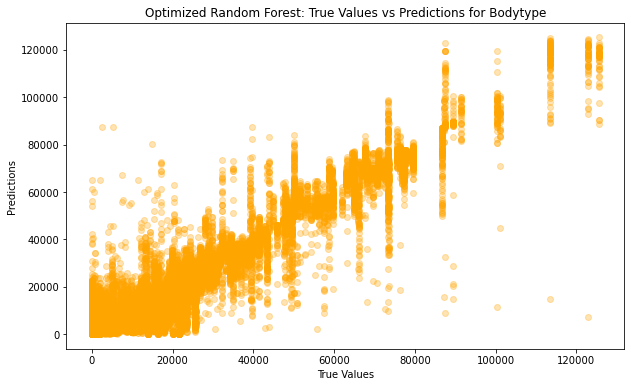

                 Feature    Importance
4                 Length  2.712573e-01
3                  Width  2.298606e-01
2                 Height  2.047096e-01
1           Engine_power  9.423150e-02
11    Bodytype_Hatchback  6.722570e-02
0           Runned_Miles  4.666700e-02
5               Seat_num  3.896185e-02
6               Door_num  2.085592e-02
13          Bodytype_MPV  5.800167e-03
17          Bodytype_SUV  5.724777e-03
9         Bodytype_Coupe  4.271210e-03
10       Bodytype_Estate  4.252932e-03
18       Bodytype_Saloon  4.120113e-03
8   Bodytype_Convertible  1.836581e-03
7     Bodytype_Combi Van  9.708090e-05
16    Bodytype_Panel Van  8.617811e-05
19   Bodytype_Window Van  3.956255e-05
14       Bodytype_Manual  9.627765e-07
15      Bodytype_Minibus  7.231697e-07
12    Bodytype_Limousine  2.916482e-07


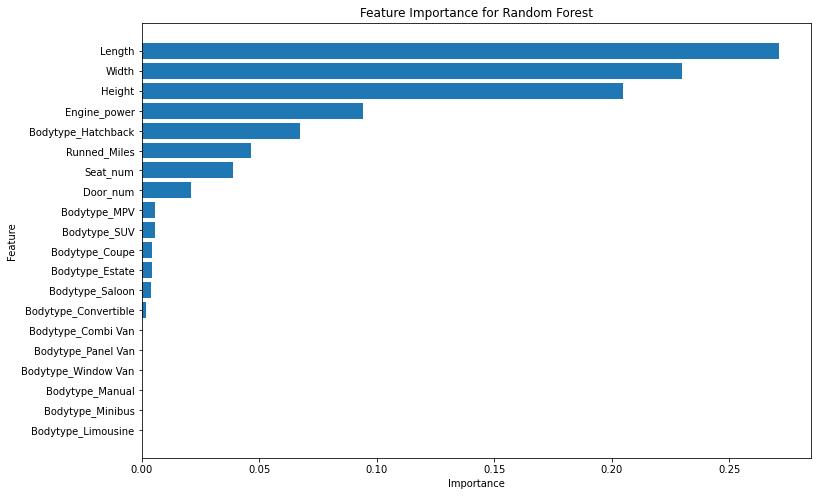

Random Forest Regression for Gearbox:

Checkpoint loaded for Gearbox
Best parameters found: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 141}
Optimized Random Forest MSE: 29809981.458706137
Optimized Random Forest R-squared: 0.9273703149203398



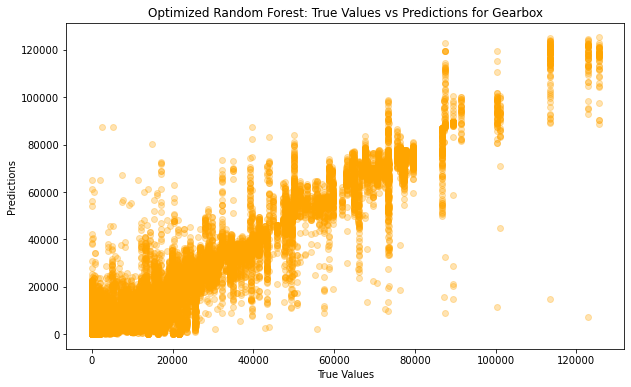

                  Feature  Importance
4                  Length    0.285381
3                   Width    0.257929
2                  Height    0.236306
1            Engine_power    0.095782
5                Seat_num    0.050838
0            Runned_Miles    0.038763
6                Door_num    0.021961
7          Gearbox_Manual    0.013018
8  Gearbox_Semi-Automatic    0.000021


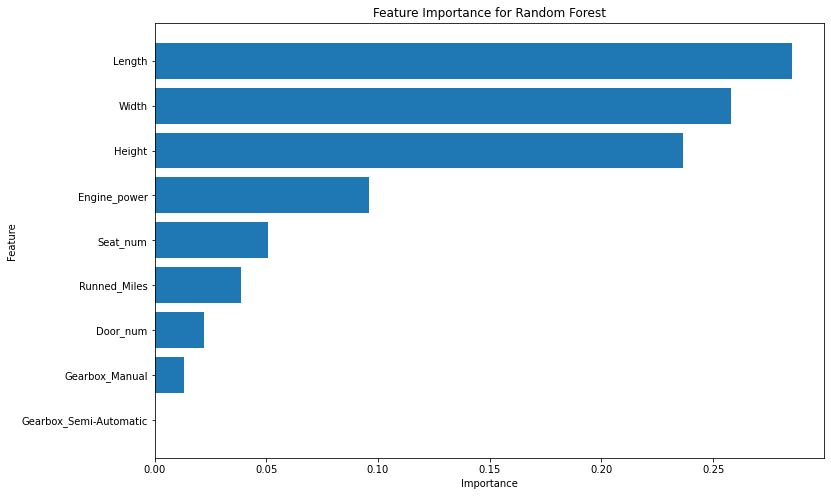

Random Forest Regression for Fuel_type:

Checkpoint loaded for Fuel_type
Best parameters found: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 118}
Optimized Random Forest MSE: 29792152.467465058
Optimized Random Forest R-squared: 0.9274137538611162



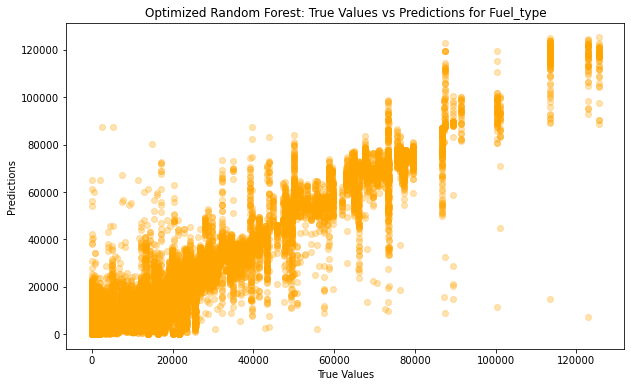

                                      Feature    Importance
2                                      Height  3.092099e-01
4                                      Length  2.936290e-01
3                                       Width  2.576380e-01
5                                    Seat_num  6.232106e-02
0                                Runned_Miles  3.691738e-02
1                                Engine_power  2.947005e-02
6                                    Door_num  7.264080e-03
14                           Fuel_type_Petrol  1.870558e-03
7                            Fuel_type_Diesel  9.700573e-04
16                    Fuel_type_Petrol Hybrid  3.645855e-04
9                          Fuel_type_Electric  2.899331e-04
12          Fuel_type_Hybrid  Petrol/Electric  2.762025e-05
13  Fuel_type_Hybrid  Petrol/Electric Plug-in  1.513371e-05
17            Fuel_type_Petrol Plug-in Hybrid  4.905026e-06
10          Fuel_type_Hybrid  Diesel/Electric  4.082942e-06
8                     Fuel_type_Diesel H

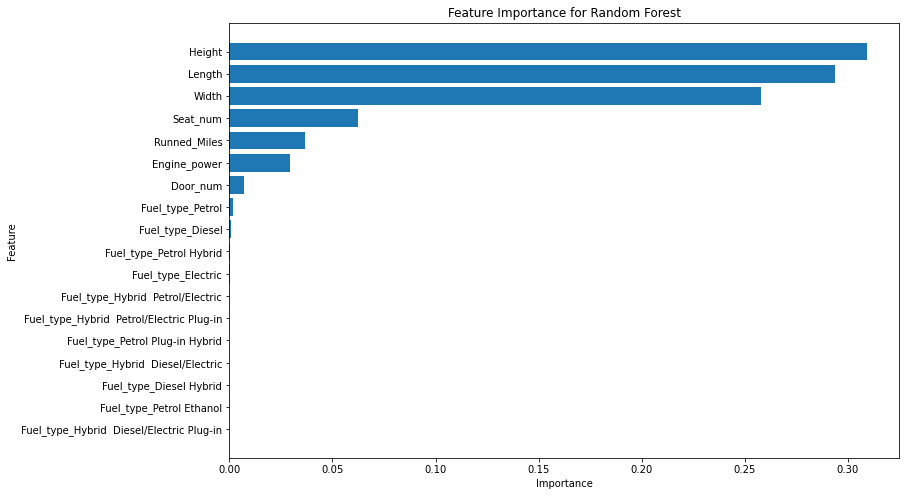

Random Forest Regression for Maker:

Checkpoint loaded for Maker
Best parameters found: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 113}
Optimized Random Forest MSE: 27945194.505654085
Optimized Random Forest R-squared: 0.931913722279665



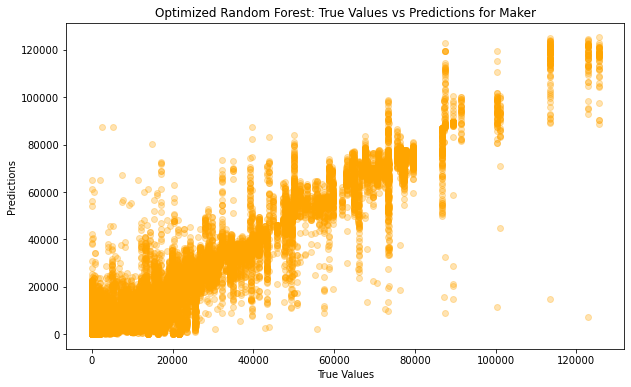

             Feature  Importance
4             Length    0.283392
2             Height    0.270224
24        Maker_ford    0.122685
60    Maker_vauxhall    0.120195
61  Maker_volkswagen    0.039517
..               ...         ...
45     Maker_perodua    0.000000
40     Maker_mclaren    0.000000
26      Maker_hummer    0.000000
29       Maker_isuzu    0.000000
16    Maker_corvette    0.000000

[63 rows x 2 columns]


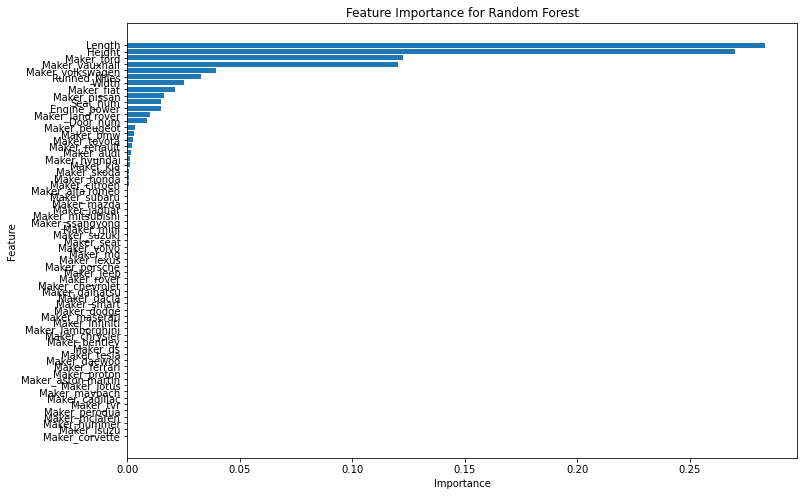

In [27]:
# Function to print evaluation metrics
def print_evaluation_metrics(name, y_test, predictions):
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{name} MSE: {mse}")
    print(f"{name} R-squared: {r2}\n")
    return mse, r2

# Categorical variables
categorical_columns = ['Color', 'Bodytype', 'Gearbox', 'Fuel_type', 'Maker']

# Loop through each categorical column
for col in categorical_columns:
    print(f"Random Forest Regression for {col}:\n")
    
    # Define independent (X) and dependent (y) variables
    X = sales_data[['Runned_Miles', 'Engine_power', 'Height', 'Width', 'Length', 'Seat_num', 'Door_num', col]]
    y = sales_data['Sales']  # Change target variable to Sales

    # Convert categorical variables to dummy (one-hot encoding)
    X = pd.get_dummies(X, drop_first=True)

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Define the parameter grid with reduced parameters
    param_dist = {
        'n_estimators': randint(100, 150),  # Reduced range
        'max_features': ['auto', 'sqrt'],   # Reduced options
        'max_depth': [10, 20],              # Reduced options
        'min_samples_split': randint(2, 6), # Reduced range
        'min_samples_leaf': randint(1, 4)   # Reduced range
    }
    
    # Define paths
    predictions_path = f'predictions_{col}_sales.pkl'
    rmse_path = f'rmse_{col}_sales.pkl'
    model_path = f'best_rf_model_{col}_sales.pkl'
    scaler_path = f'scaler_{col}_sales.pkl'
    best_params_path = f'best_params_{col}_sales.pkl'
    
    # Load checkpoints if they exist
    if os.path.exists(predictions_path) and os.path.exists(rmse_path) and os.path.exists(model_path) and os.path.exists(scaler_path) and os.path.exists(best_params_path):
        predictions_df = joblib.load(predictions_path)
        RMSE = joblib.load(rmse_path)
        mse = RMSE['mse']
        r2 = RMSE['r2']
        best_rf_model = joblib.load(model_path)
        scaler = joblib.load(scaler_path)
        best_params = joblib.load(best_params_path)
        print(f"Checkpoint loaded for {col}")
        print(f"Best parameters found: {best_params}")
        print(f"Optimized Random Forest MSE: {mse}")
        print(f"Optimized Random Forest R-squared: {r2}\n")
    else:
        # Initialize the Random Forest model
        rf_model = RandomForestRegressor(random_state=42)

        # Initialize RandomizedSearchCV with reduced n_iter
        random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1, verbose=2, random_state=42)

        # Fit RandomizedSearchCV
        random_search.fit(X_train, y_train)

        # Get the best parameters
        best_params = random_search.best_params_
        print("Best parameters found: ", best_params)

        # Train the Random Forest model with the best parameters
        best_rf_model = RandomForestRegressor(**best_params, random_state=42)
        best_rf_model.fit(X_train, y_train)
        rf_predictions = best_rf_model.predict(X_test)

        # Evaluate the model
        rf_mse, rf_r2 = print_evaluation_metrics("Optimized Random Forest", y_test, rf_predictions)

        # Save the model, scaler, predictions, and metrics
        joblib.dump(best_rf_model, model_path)
        joblib.dump(scaler, scaler_path)
        joblib.dump(rf_predictions, predictions_path)
        joblib.dump({'mse': rf_mse, 'r2': rf_r2}, rmse_path)
        joblib.dump(best_params, best_params_path)
        print(f"Checkpoint saved for {col}")

    # Visualization of results
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, rf_predictions, alpha=0.3, color='orange')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'Optimized Random Forest: True Values vs Predictions for {col}')
    plt.show()

    # Feature importance
    importances = best_rf_model.feature_importances_
    feature_names = X.columns

    # Create a DataFrame for feature importance
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })

    # Sort the DataFrame by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print(feature_importance_df)

    # Plot feature importance
    plt.figure(figsize=(12, 8))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance for Random Forest')
    plt.gca().invert_yaxis()
    plt.show()


### *Step 5: Neural Network*

#### Resale Price

Checkpoint loaded.
Train MSE: 0.16164597088990415
Test MSE: 0.13728816424336743
Train R-squared: 0.8421205689815012
Test R-squared: 0.865843401802435


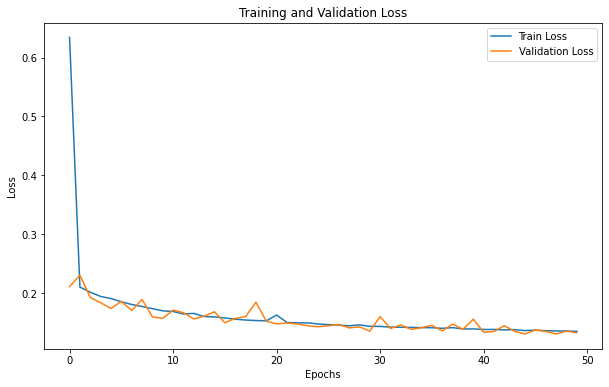

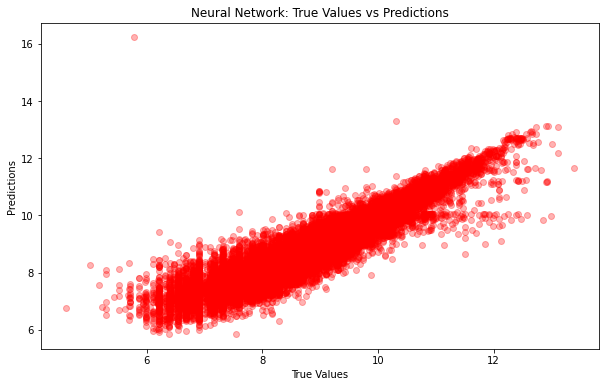

In [28]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense

# Independent (X) and dependent (y) variables
X = merged_data[['Runned_Miles', 'Engine_power', 'Height', 'Width', 'Length', 'Seat_num', 'Door_num']]
y = merged_data['Log_Resale_Price']

# Convert categorical variables to dummy (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()

# Define paths for checkpoints
model_path = 'neural_network_model_price.h5'
scaler_path = 'scaler_NN_price.pkl'
history_path = 'history_price.pkl'

# Check if checkpoints exist
if os.path.exists(model_path) and os.path.exists(scaler_path) and os.path.exists(history_path):
    # Load checkpoints
    model = load_model(model_path)
    scaler = joblib.load(scaler_path)
    history = joblib.load(history_path)
    print("Checkpoint loaded.")

    # Evaluate the model
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    print(f"Train MSE: {train_mse}")
    print(f"Test MSE: {test_mse}")
    print(f"Train R-squared: {train_r2}")
    print(f"Test R-squared: {test_r2}")

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_test, alpha=0.3, color='red')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('Neural Network: True Values vs Predictions')
    plt.show()

else:
    # Train and save checkpoints
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the neural network model
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, validation_split=0.2)

    # Save the model, scaler, and history
    model.save(model_path)
    joblib.dump(scaler, scaler_path)
    joblib.dump(history.history, history_path)
    print("Checkpoint saved.")

    # Convert history to a format that can be accessed
    history = history.history

    # Evaluate the model
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    print(f"Train MSE: {train_mse}")
    print(f"Test MSE: {test_mse}")
    print(f"Train R-squared: {train_r2}")
    print(f"Test R-squared: {test_r2}")

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_test, alpha=0.3, color='red')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('Neural Network: True Values vs Predictions')
    plt.show()

#### Sales

Checkpoint loaded.
Train MSE: 181842155.18457174
Test MSE: 183337997.15581608
Train R-squared: 0.5571995067713901
Test R-squared: 0.553311329126184


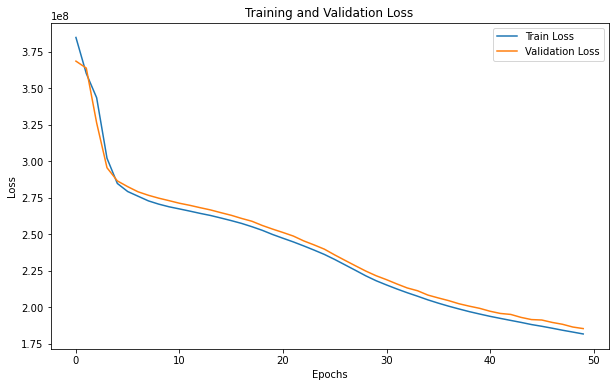

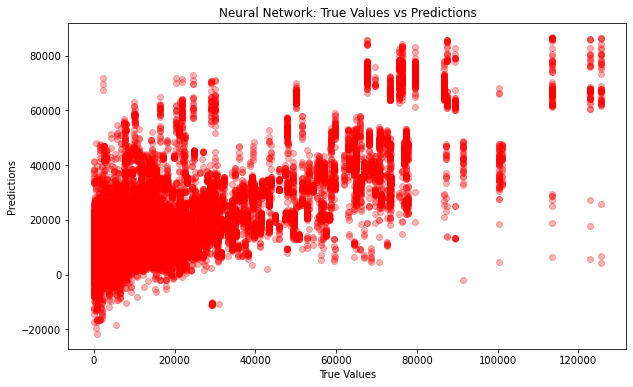

In [29]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense

# Independent (X) and dependent (y) variables
X = sales_data[['Runned_Miles', 'Engine_power', 'Height', 'Width', 'Length', 'Seat_num', 'Door_num']]
y = sales_data['Sales']

# Convert categorical variables to dummy (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()

# Define paths for checkpoints
model_path = 'neural_network_model_sales.h5'
scaler_path = 'scaler_NN_sales.pkl'
history_path = 'history_sales.pkl'

# Check if checkpoints exist
if os.path.exists(model_path) and os.path.exists(scaler_path) and os.path.exists(history_path):
    # Load checkpoints
    model = load_model(model_path)
    scaler = joblib.load(scaler_path)
    history = joblib.load(history_path)
    print("Checkpoint loaded.")

    # Evaluate the model
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    print(f"Train MSE: {train_mse}")
    print(f"Test MSE: {test_mse}")
    print(f"Train R-squared: {train_r2}")
    print(f"Test R-squared: {test_r2}")

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_test, alpha=0.3, color='red')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('Neural Network: True Values vs Predictions')
    plt.show()

else:
    # Train and save checkpoints
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the neural network model
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, validation_split=0.2)

    # Save the model, scaler, and history
    model.save(model_path)
    joblib.dump(scaler, scaler_path)
    joblib.dump(history.history, history_path)
    print("Checkpoint saved.")

    # Convert history to a format that can be accessed
    history = history.history

    # Evaluate the model
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    print(f"Train MSE: {train_mse}")
    print(f"Test MSE: {test_mse}")
    print(f"Train R-squared: {train_r2}")
    print(f"Test R-squared: {test_r2}")

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_test, alpha=0.3, color='red')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('Neural Network: True Values vs Predictions')
    plt.show()

### *Step 6: Model optimization*

#### Cross validation:
##### Resale Price models:

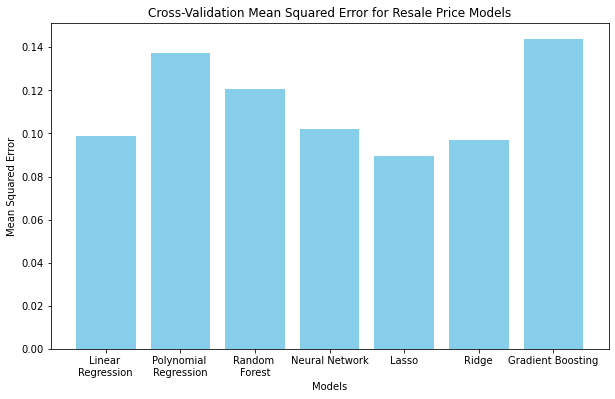

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline

# Assuming X_resale and y_resale are the features and target for resale price
X_resale = np.random.rand(100, 5)  # Replace with your data
y_resale = np.random.rand(100)     # Replace with your data

# Models
models_resale = {
    'Linear \nRegression': LinearRegression(),
    'Polynomial \nRegression': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'Random \nForest': RandomForestRegressor(n_estimators=100),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(50,50), max_iter=1000),
    'Lasso': Lasso(alpha=1.0),
    'Ridge': Ridge(alpha=1.0),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100)
}

# Cross-validation
cv_results_resale = {}
for name, model in models_resale.items():
    # Performing cross-validation and storing the mean negative MSE
    scores = cross_val_score(model, X_resale, y_resale, cv=5, scoring='neg_mean_squared_error')
    cv_results_resale[name] = np.mean(-scores)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(cv_results_resale.keys(), cv_results_resale.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Cross-Validation Mean Squared Error for Resale Price Models')
plt.show()

##### Sales models:

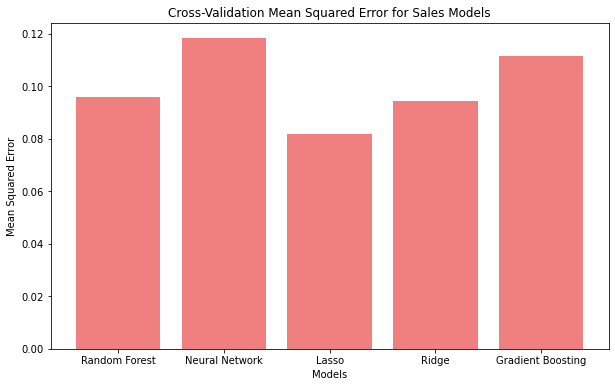

In [17]:
# Assuming X_sales and y_sales are the features and target for sales
X_sales = np.random.rand(100, 5)  # Replace with your data
y_sales = np.random.rand(100)     # Replace with your data

# Models
models_sales = {
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(50,50), max_iter=1000),
    'Lasso': Lasso(alpha=1.0),
    'Ridge': Ridge(alpha=1.0),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100)
}

# Cross-validation
cv_results_sales = {}
for name, model in models_sales.items():
    # Performing cross-validation and storing the mean negative MSE
    scores = cross_val_score(model, X_sales, y_sales, cv=5, scoring='neg_mean_squared_error')
    cv_results_sales[name] = np.mean(-scores)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(cv_results_sales.keys(), cv_results_sales.values(), color='lightcoral')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Cross-Validation Mean Squared Error for Sales Models')
plt.show()